In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report, roc_curve,
                             precision_recall_fscore_support
                             )

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/dataset_socbiz
df = pd.read_csv('Airline_Delay_Cause.csv')

/content/drive/My Drive/dataset_socbiz


In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [ ]:
df.shape

(179338, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,179338.0,2019.480082,2.410204,2015.0,2018.00,2020.00,2022.00,2023.00
month,179338.0,6.485725,3.463516,1.0,3.00,6.00,9.00,12.00
arr_flights,178997.0,327.816969,931.001446,1.0,41.00,89.00,218.00,21977.00
arr_del15,178747.0,58.709086,164.378035,0.0,6.00,15.00,40.00,4176.00
carrier_ct,178997.0,18.572643,47.389651,0.0,1.96,5.40,14.70,1293.91
weather_ct,178997.0,2.035742,6.894812,0.0,0.00,0.22,1.62,266.42
nas_ct,178997.0,17.094929,56.279604,0.0,1.00,3.30,9.86,1884.42
security_ct,178997.0,0.145307,0.702149,0.0,0.00,0.00,0.00,58.69
late_aircraft_ct,178997.0,20.778477,64.912766,0.0,1.00,4.29,13.01,2069.07
arr_cancelled,178997.0,6.830103,41.446756,0.0,0.00,1.00,3.00,4951.00


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,341
arr_del15,591
carrier_ct,341
weather_ct,341


In [ ]:
# Removing rows where arr_flights is 0 or arr_delay is missing
df = df[(df["arr_flights"] > 0) & (df["arr_delay"].notna())].copy()

In [ ]:
df["avg_delay"] = df["arr_delay"] / df["arr_flights"]

**we can see that there are many missing values in the dataset.
In this approach we have taken "avg_delay" which is the ratio of arr_delay to arr_flights.**

# Exploratory Data Analysis (EDA)

## Univariate Analysis

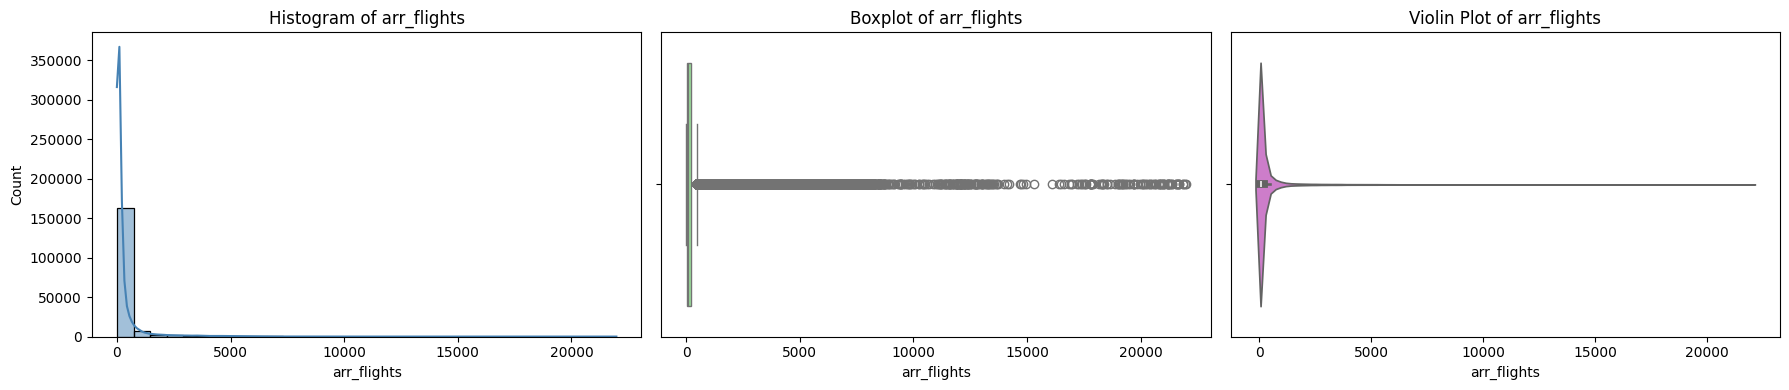

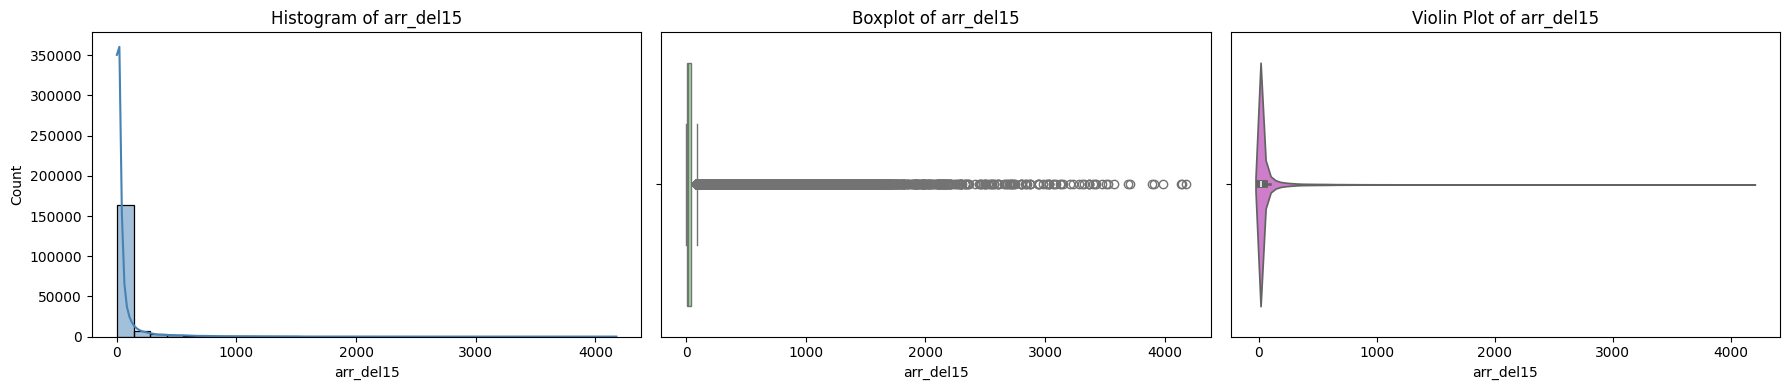

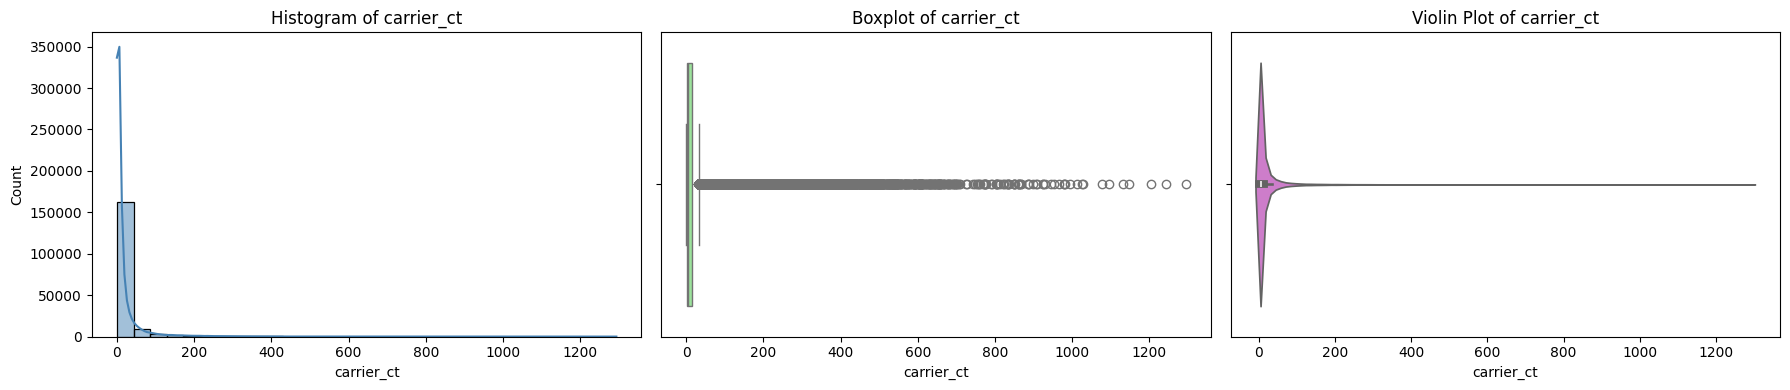

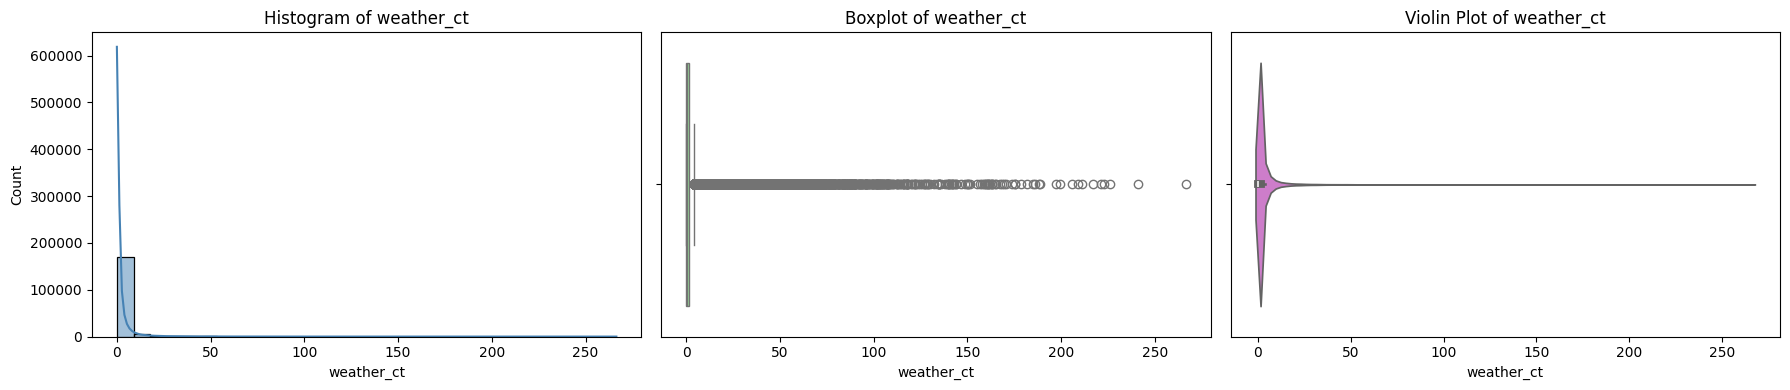

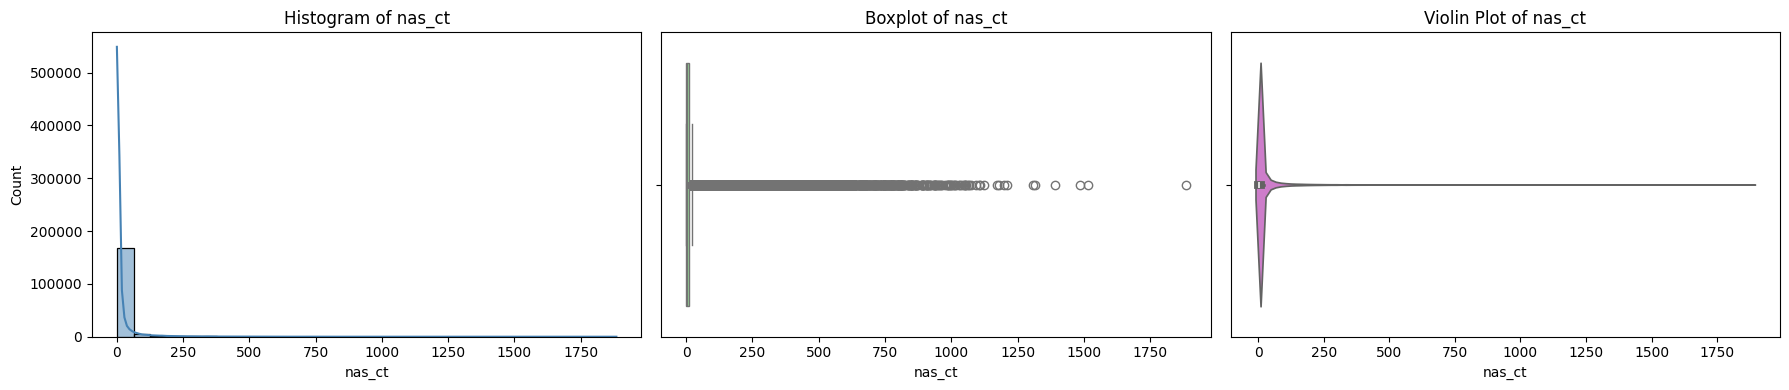

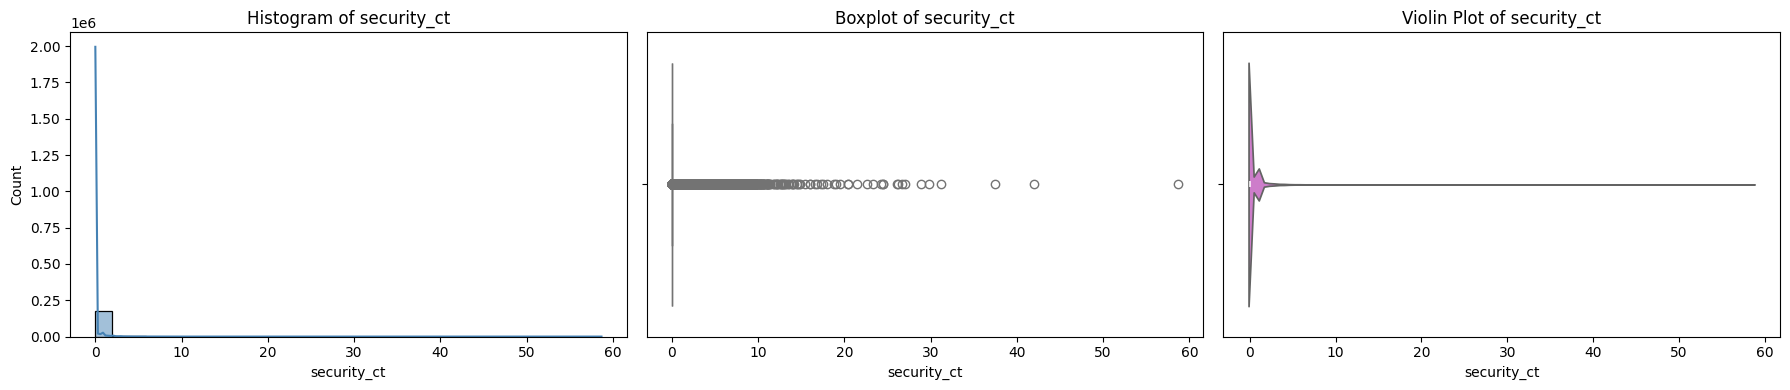

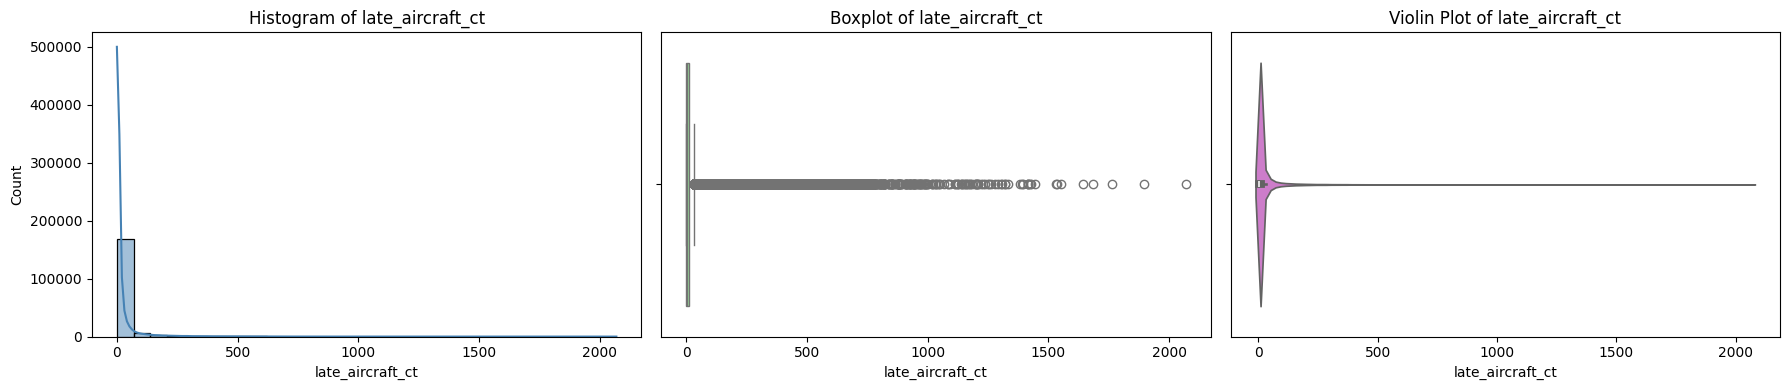

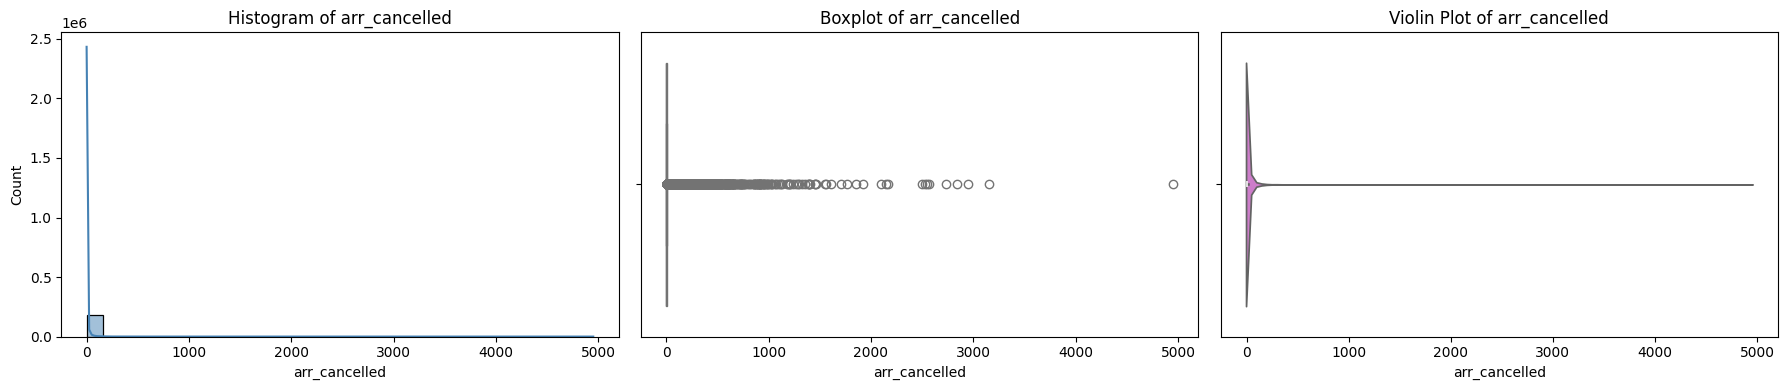

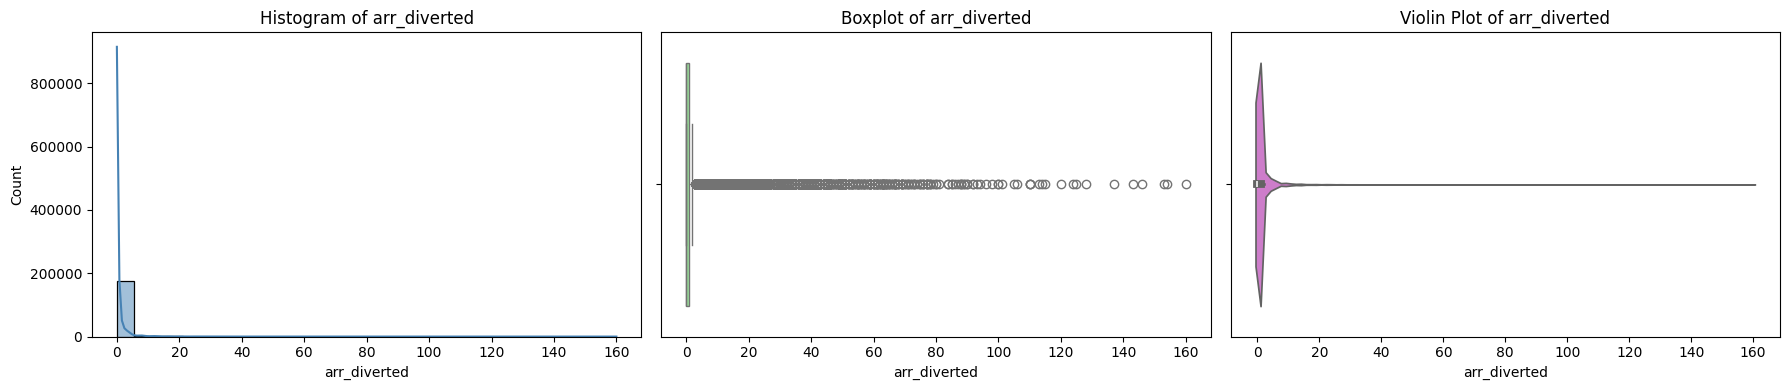

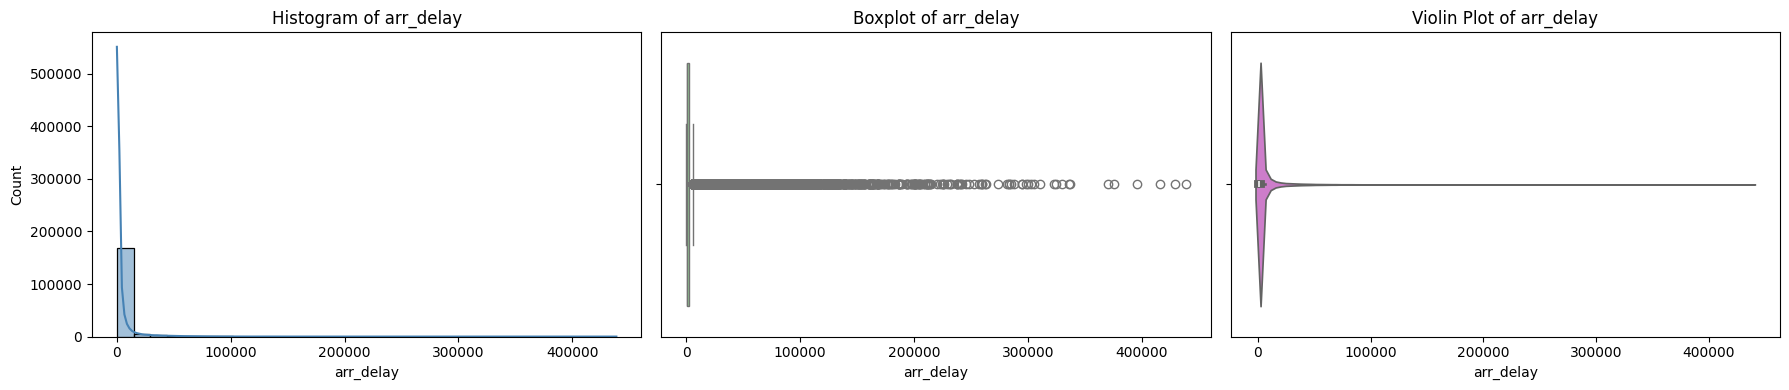

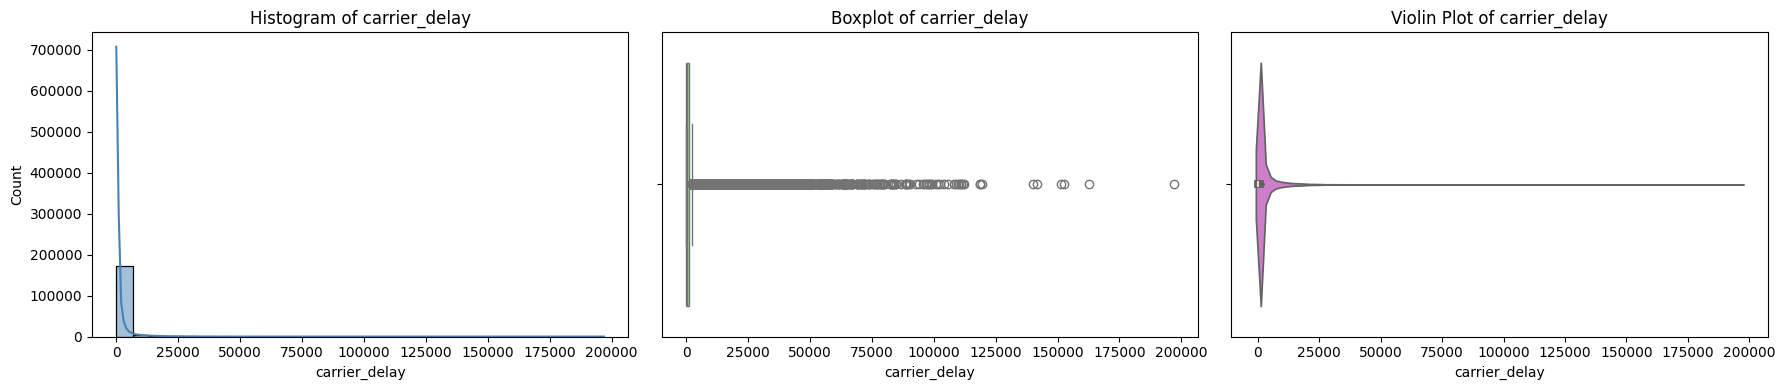

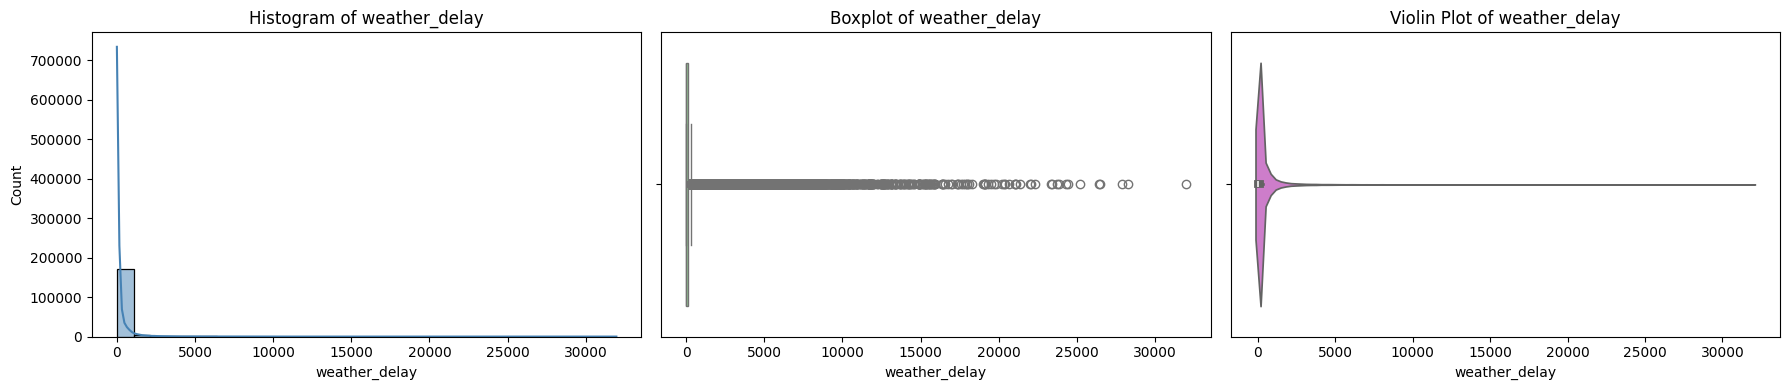

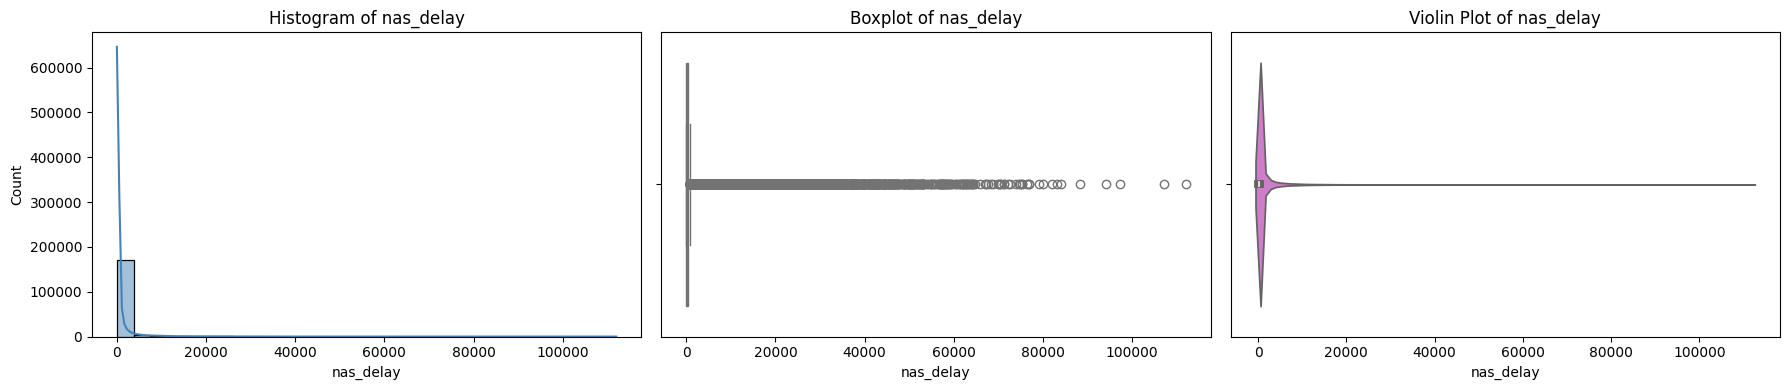

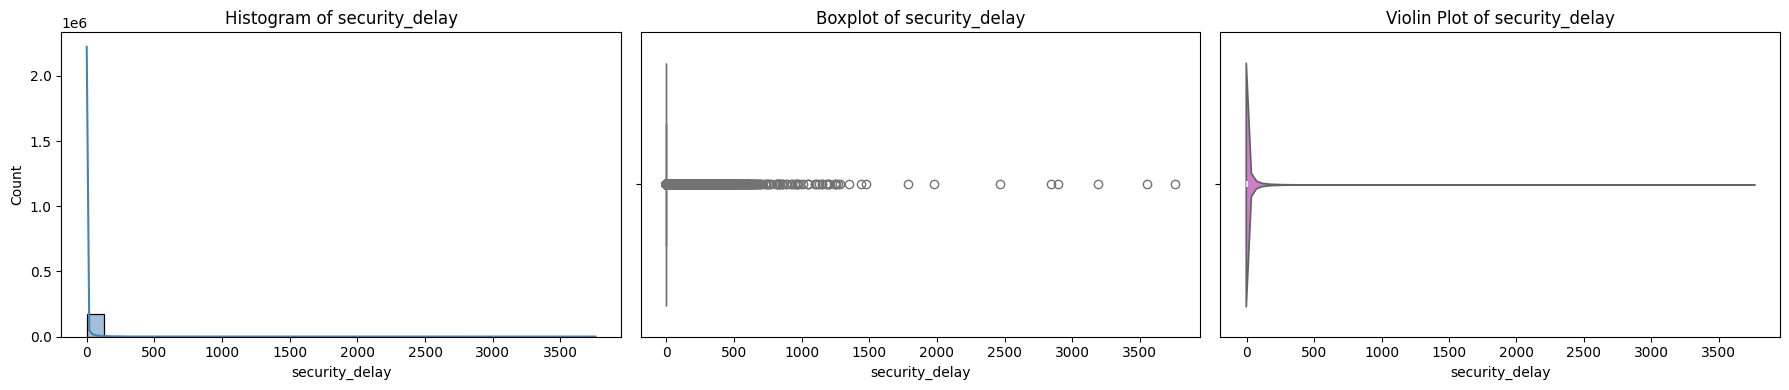

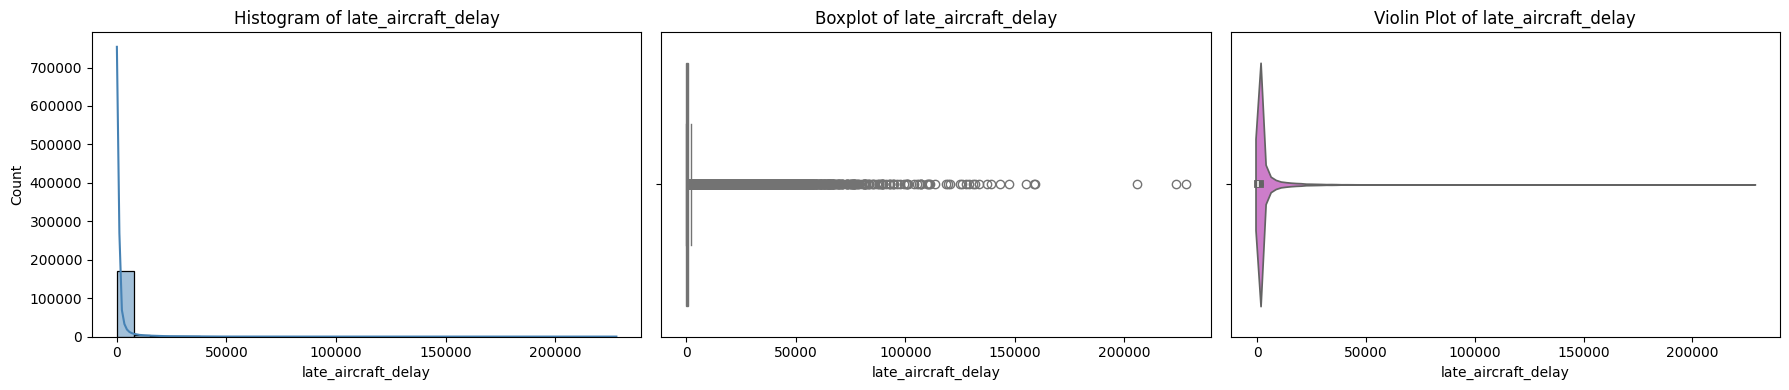

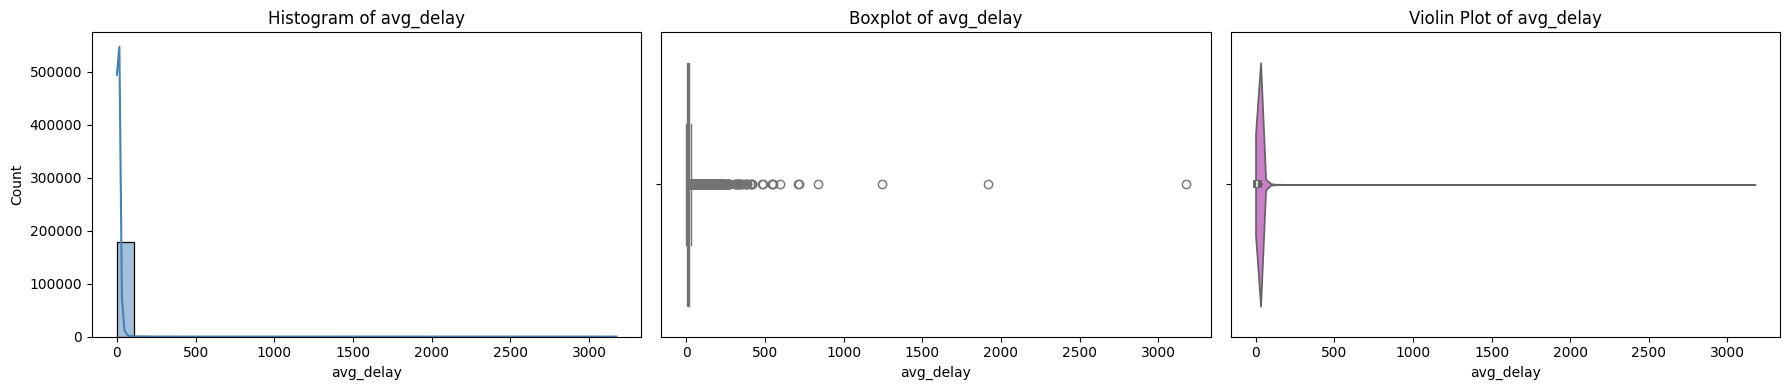

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop(['year', 'month'])

for col in numerical_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[col], kde=True, ax=axes[0], color='steelblue', bins=30)
    axes[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"Boxplot of {col}")
    sns.violinplot(x=df[col], ax=axes[2], color='orchid')
    axes[2].set_title(f"Violin Plot of {col}")
    plt.tight_layout()
    plt.show()

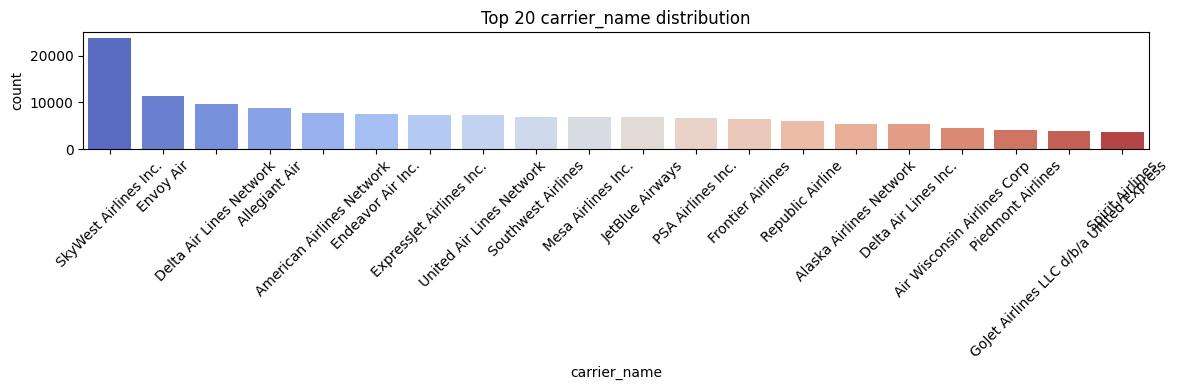

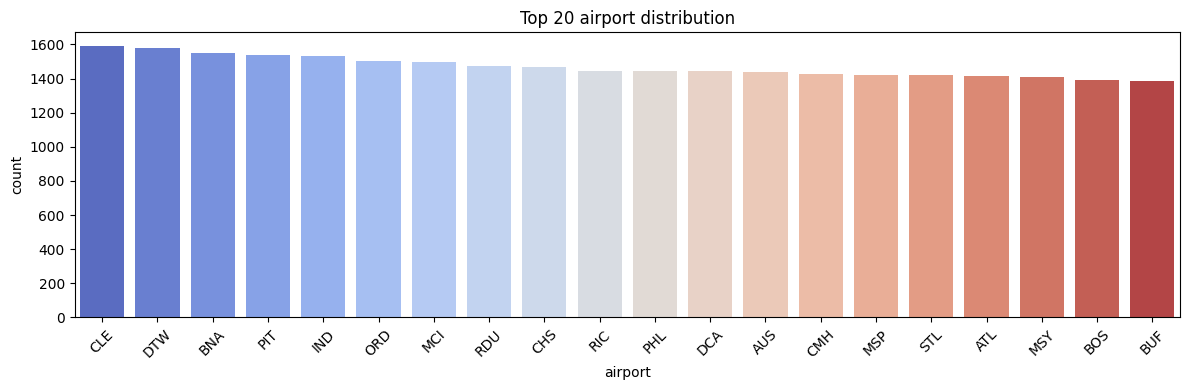

In [ ]:
categorical_cols = ['carrier_name', 'airport']

for col in categorical_cols:
    plt.figure(figsize=(12,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index[:20], palette="coolwarm")
    plt.xticks(rotation=45)
    plt.title(f"Top 20 {col} distribution")
    plt.tight_layout()
    plt.show()

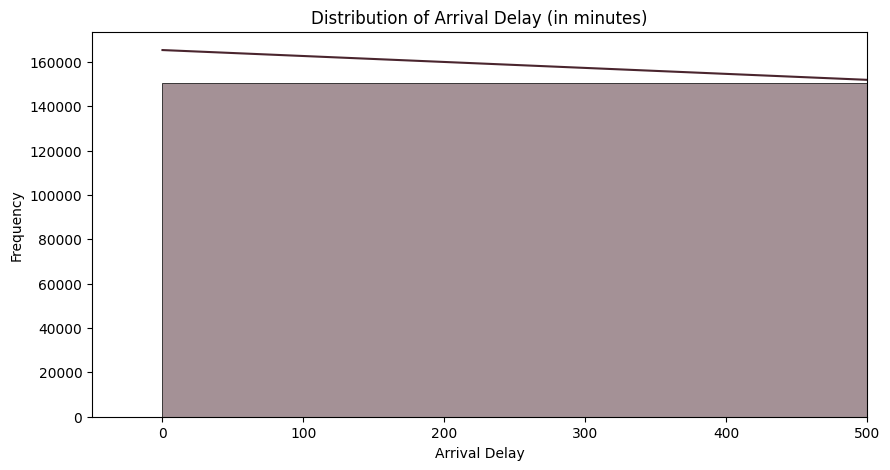

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

# Distribution of Arrival Delay
sns.histplot(df['arr_delay'], bins=100, kde=True, color=sns.color_palette("icefire", as_cmap=True)(0.6))
plt.title("Distribution of Arrival Delay (in minutes)")
plt.xlabel("Arrival Delay")
plt.ylabel("Frequency")
plt.xlim(-50, 500)
plt.show()

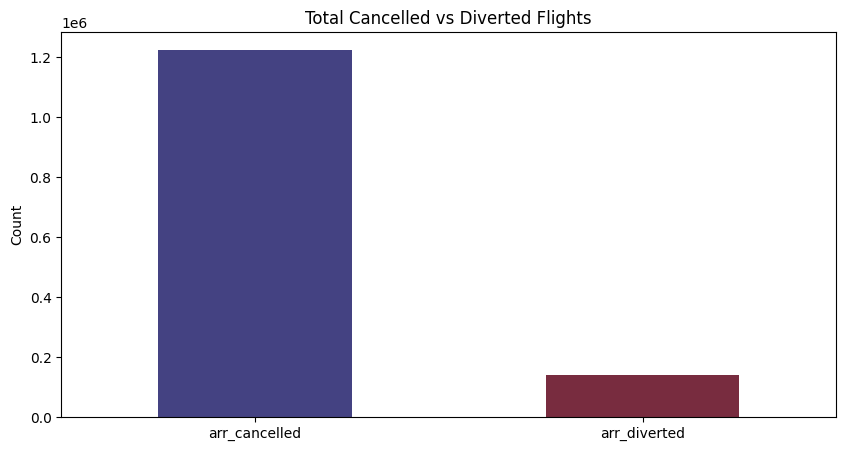

In [ ]:
# Distribution of Cancelled and Diverted Flights
cancel_divert = df[['arr_cancelled', 'arr_diverted']].sum()
colors = sns.color_palette("icefire", n_colors=2)
cancel_divert.plot(kind='bar', color=colors)
plt.title("Total Cancelled vs Diverted Flights")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

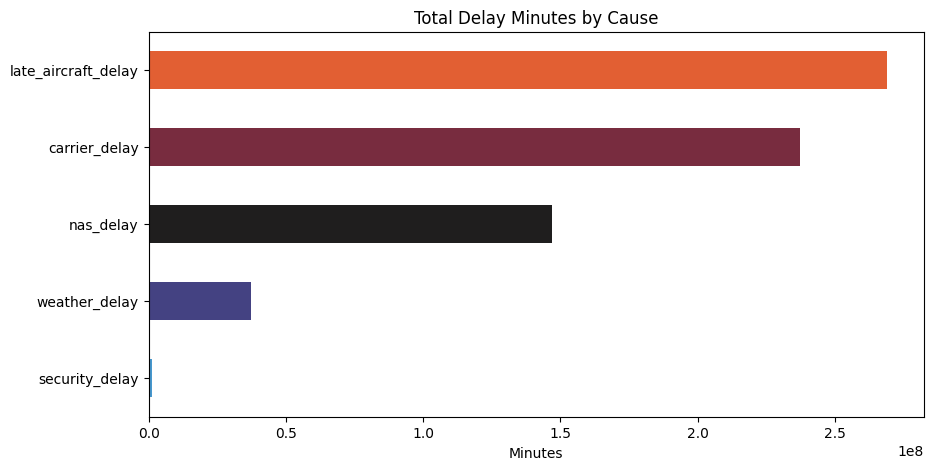

In [ ]:
# Total Delay Minutes by Cause
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
colors = sns.color_palette("icefire", n_colors=5)
df[delay_cols].sum().sort_values().plot(kind='barh', color=colors)
plt.title("Total Delay Minutes by Cause")
plt.xlabel("Minutes")
plt.show()

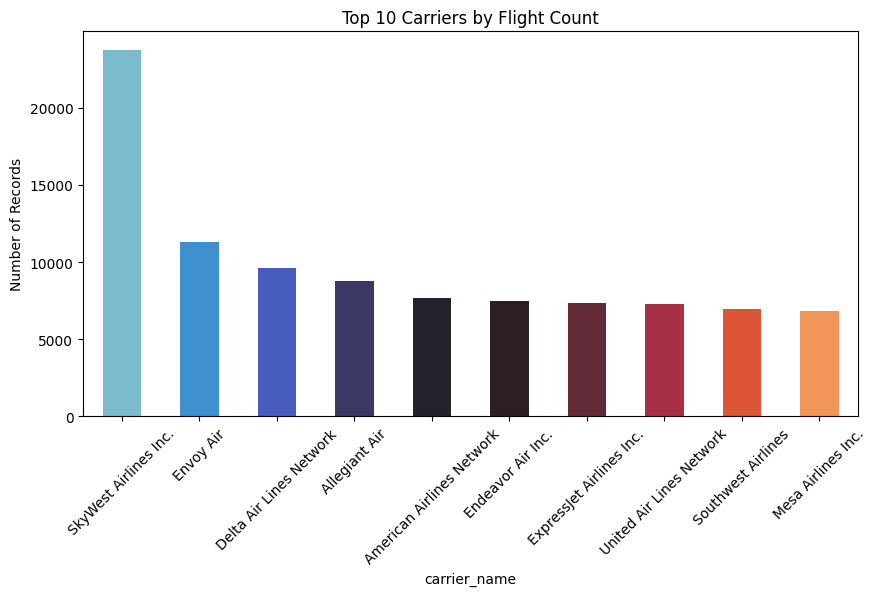

In [ ]:
# Count of Flights by Top 10 Carriers
colors = sns.color_palette("icefire", n_colors=10)
df['carrier_name'].value_counts().head(10).plot(kind='bar', color=colors)
plt.title("Top 10 Carriers by Flight Count")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.show()

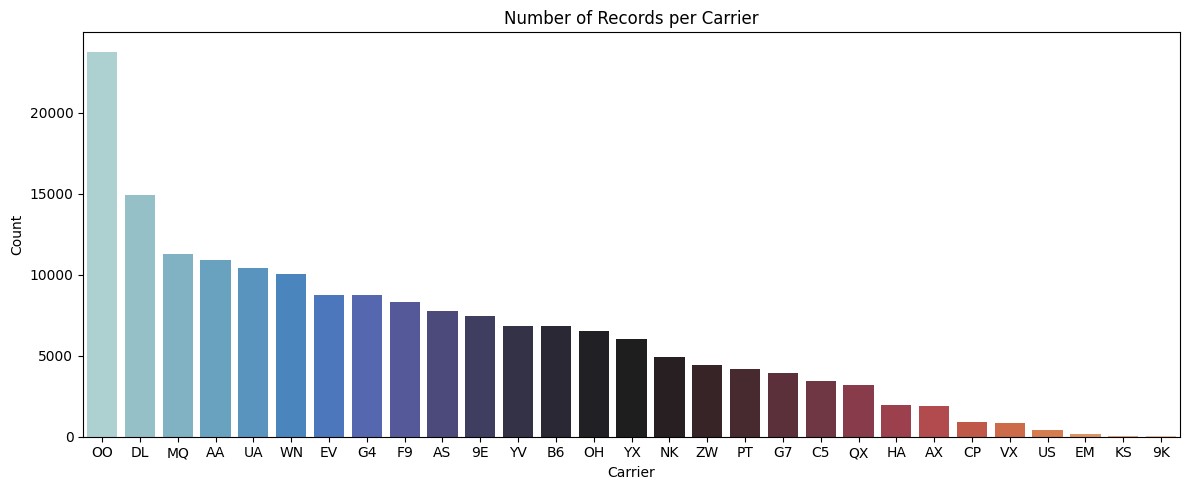

In [ ]:
# Frequency of carriers
plt.figure(figsize=(12, 5))
sns.countplot(x="carrier", data=df,  palette='icefire', order=df["carrier"].value_counts().index)
plt.title("Number of Records per Carrier")
plt.xlabel("Carrier")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Bivariate Analysis

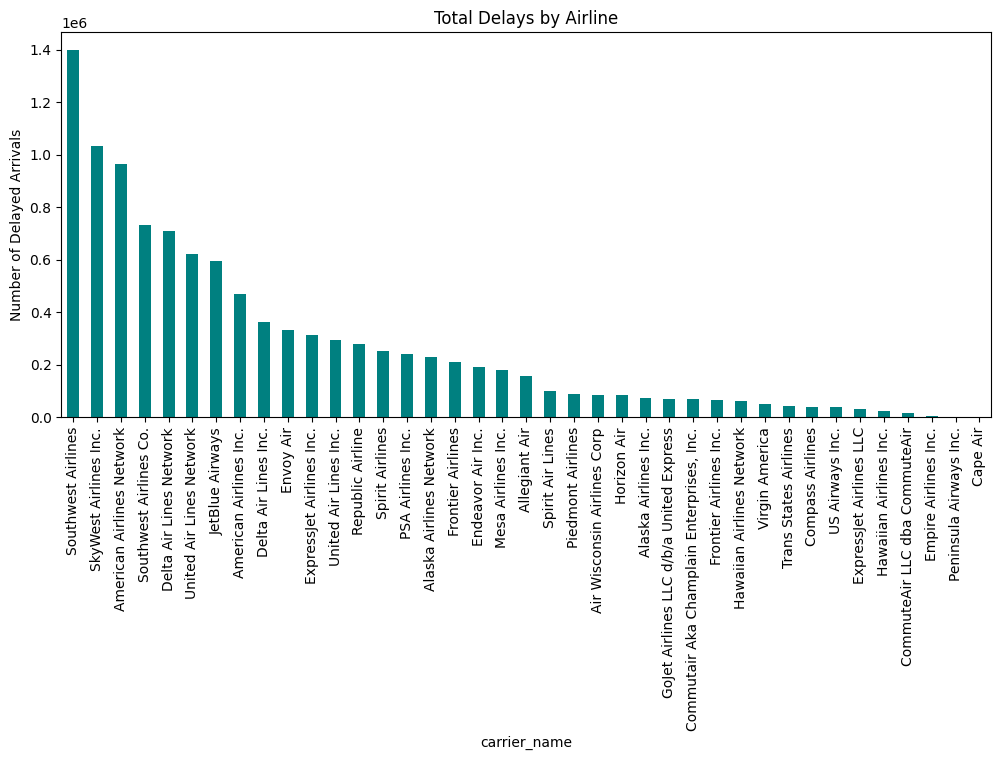

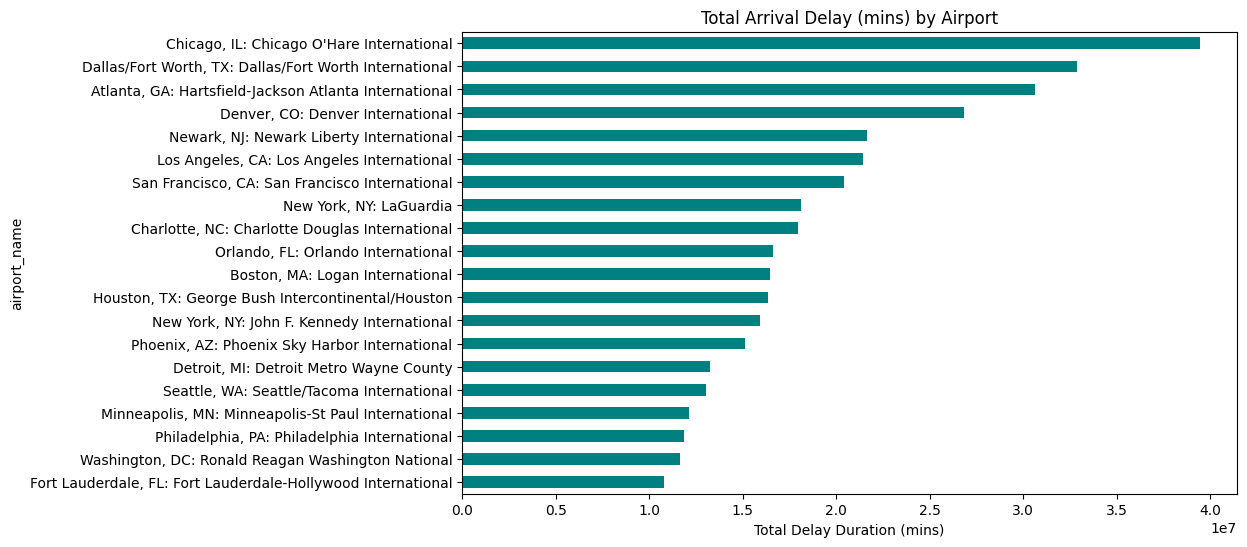

In [ ]:
# Delay count by carrier
carrier_delay = df.groupby('carrier_name')['arr_del15'].sum().sort_values(ascending=False)
carrier_delay.plot(kind='bar', figsize=(12,5), color='teal', title="Total Delays by Airline")
plt.ylabel("Number of Delayed Arrivals")
plt.show()

# Delay duration by airport
airport_delay = df.groupby('airport_name')['arr_delay'].sum().sort_values(ascending=False).head(20)
airport_delay.plot(kind='barh', figsize=(10,6), color='teal', title="Total Arrival Delay (mins) by Airport")
plt.xlabel("Total Delay Duration (mins)")
plt.gca().invert_yaxis()
plt.show()

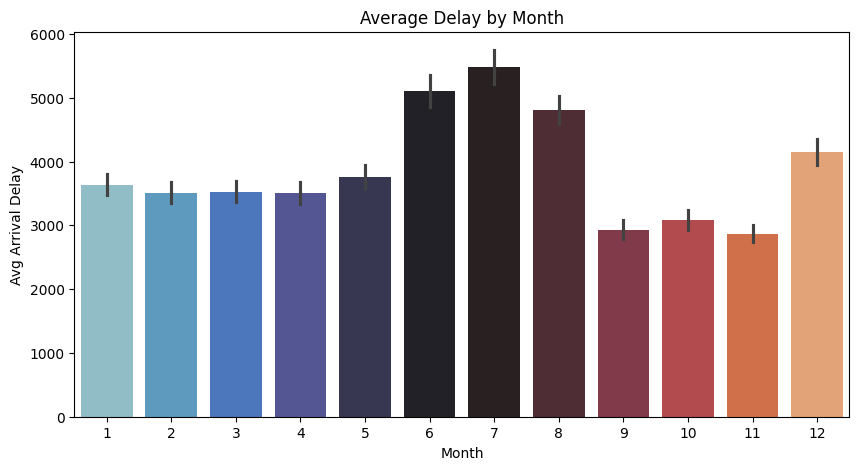

In [ ]:
# Average Delay Minutes by Month
sns.barplot(x='month', y='arr_delay', data=df, palette='icefire')
plt.title("Average Delay by Month")
plt.ylabel("Avg Arrival Delay")
plt.xlabel("Month")
plt.show()

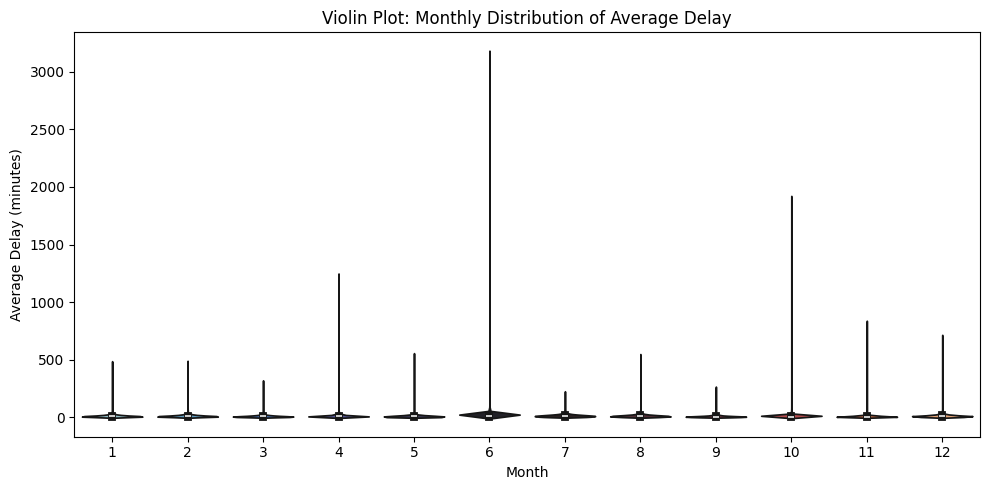

In [ ]:
# Violin Plot of avg_delay per Month
plt.figure(figsize=(10, 5))
sns.violinplot(x="month", y="avg_delay", data=df, inner="box", palette='icefire')
plt.title("Violin Plot: Monthly Distribution of Average Delay")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.tight_layout()
plt.show()

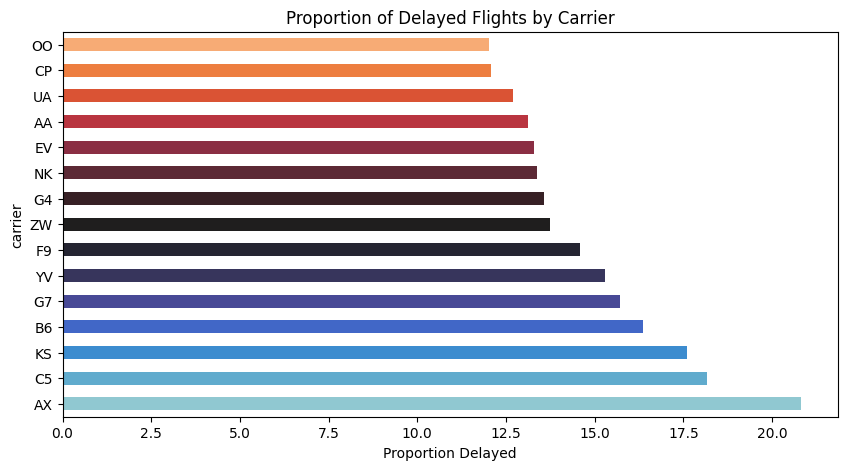

In [ ]:
carrier_delay = df.groupby("carrier")["avg_delay"].mean().sort_values(ascending=False)
colors = sns.color_palette("icefire", n_colors=15)
carrier_delay.head(15).plot(kind='barh', color=colors)
plt.title("Proportion of Delayed Flights by Carrier")
plt.xlabel("Proportion Delayed")
plt.show()

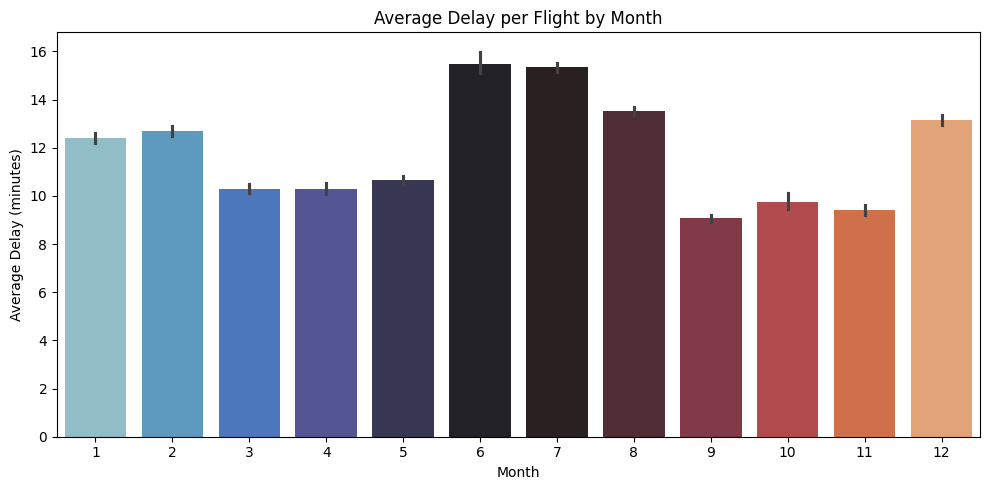

In [ ]:
# Average delay per flight by month
plt.figure(figsize=(10, 5))
sns.barplot(x="month", y="avg_delay", data=df, estimator=np.mean, palette='icefire')
plt.title("Average Delay per Flight by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.tight_layout()
plt.show()

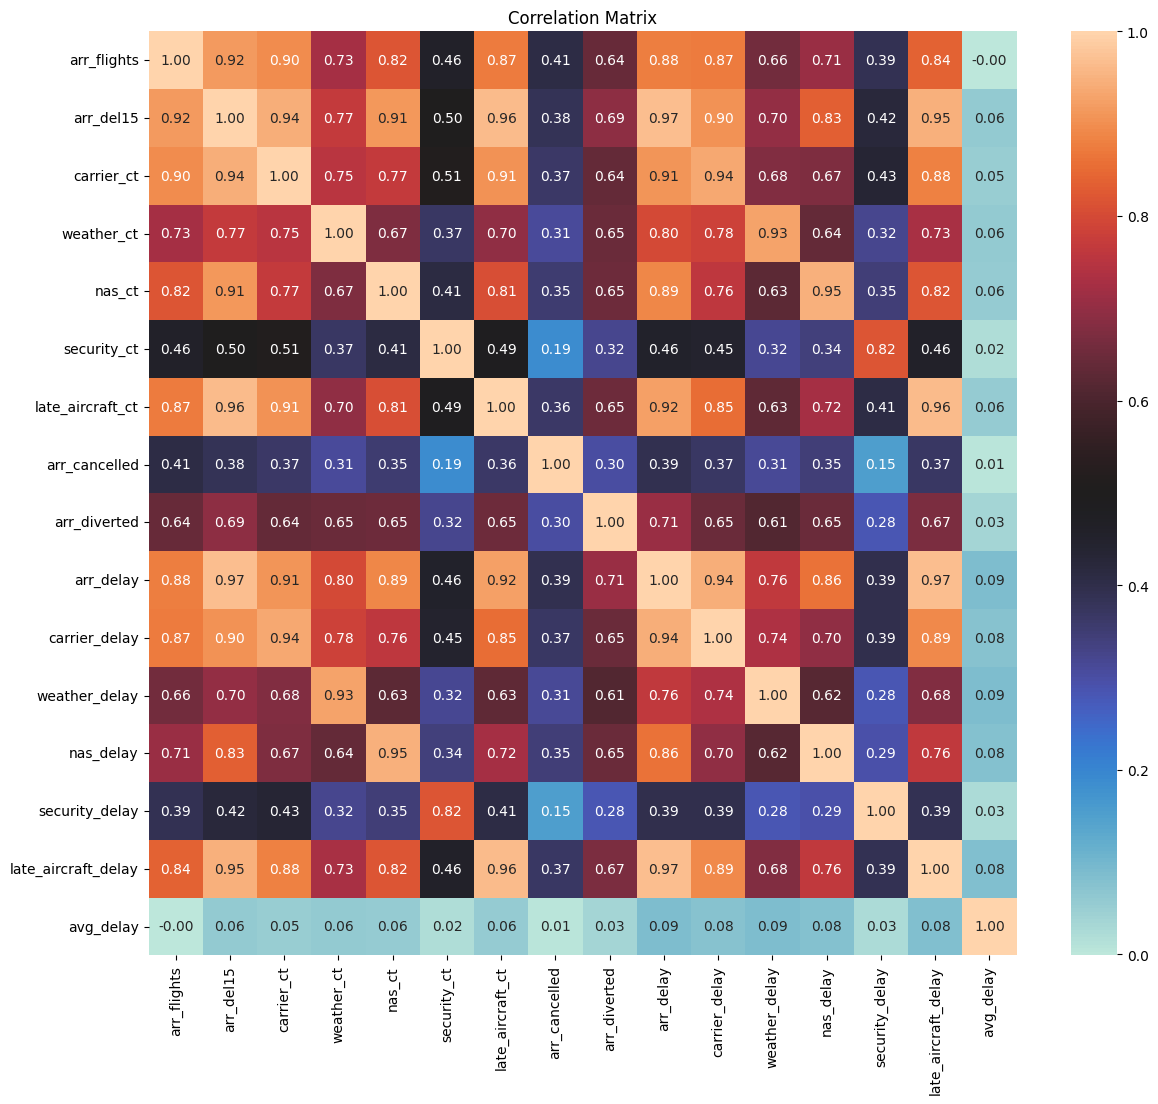

In [ ]:
plt.figure(figsize=(14,12))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='icefire', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

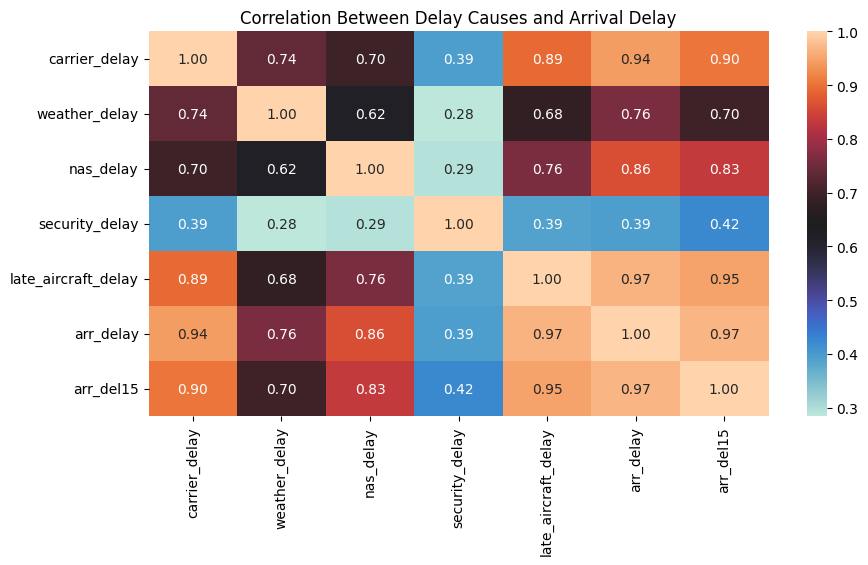

In [ ]:
# Correlation Heatmap with Delay Causes
correlation = df[delay_cols + ['arr_delay', 'arr_del15']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='icefire')
plt.title("Correlation Between Delay Causes and Arrival Delay")
plt.show()

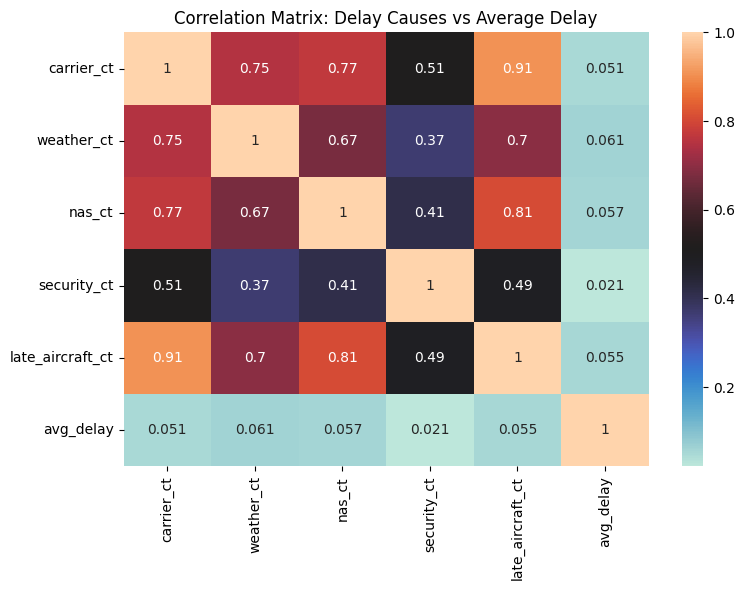

In [ ]:
# Correlation heatmap between delay components and avg_delay
delay_cols = ["carrier_ct", "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct"]

plt.figure(figsize=(8, 6))
sns.heatmap(df[delay_cols + ["avg_delay"]].corr(), annot=True, cmap="icefire")
plt.title("Correlation Matrix: Delay Causes vs Average Delay")
plt.tight_layout()
plt.show()

**Insights of EDA performed**
1. Flight Arrivals
  - The distribution of arriving flights per month is right-skewed. Some months have an unusually high number of arrivals.
  - Busiest months (high arr_flights) correlate with higher delays due to congestion and operational load.
  - late_aircraft_delay and carrier_delay majorly accounts for the delay caused.

2. Month and Year
  - July, August, and December have peak frequencies.
  - these months align with holiday travel seasons in the US.

3. Delay Duration
  - Most delays are short (under 15 minutes), but some extreme cases (up to 500+ minutes) exist. These outliers are important to detect and needed to be removed.

4. Target Variable: Average Delay (avg_delay)
  - Extreme outliers exist.
  - Large concentration around 0–10 minutes.

# Removing Outliers

In [ ]:
# Removing outliers
q1 = df["avg_delay"].quantile(0.25)
q3 = df["avg_delay"].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
df = df[df["avg_delay"] <= upper_bound].copy()

# Feature Engineering

In [ ]:
def feature_engg(df):
    df['is_delayed'] = (df['arr_del15'] > 0).astype(int)

    # Controllable and external delays
    df['controllable_delay'] = df['carrier_delay'] + df['late_aircraft_delay']
    df['external_delay'] = df['weather_delay'] + df['nas_delay'] + df['security_delay']

    # Removing flights with very low volume as they unreliable
    df = df[df['arr_flights'] > 10]

    # Create delay ratio feature
    df['delay_rate'] = df['arr_del15'] / df['arr_flights']
    df['avg_delay'] = df['arr_delay'] / df['arr_flights']

    # Create season from month
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'
    df['season'] = df['month'].apply(get_season)

    # Total delay events and minutes
    df['total_delay_ct'] = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum(axis=1)
    df['total_delay_min'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)

    # Log-transformed delay values
    df['log_avg_delay'] = np.log1p(df['avg_delay'])
    df['log_total_delay_min'] = np.log1p(df['total_delay_min'])

    # Peak season flag (May–Aug, Dec)
    df['peak_season'] = df['month'].apply(lambda x: 1 if x in [5, 6, 7, 8, 12] else 0)
    df["monthly_traffic"] = df.groupby(["airport", "month"])["arr_flights"].transform("sum")

    return df

df = feature_engg(df)

1. **is_delayed** is a binary column (1 if arravival flight is delayed by more than 15 minutes else 0)
  - this will help in classification task

2. **total_delay_ct** aggregates the number of delay incidents, giving a simple measure of overall disruption for a given flight or time window.

3. Splitting delays into controllable vs. external helps model real-world operational vs. uncontrollable risks. For example, weather is not under airline control, but carrier delays are.
  - controllable_delay = carrier_delay + late_aircraft_delay
  - external_delay = weather_delay + nas_delay + security_delay

4. **delay_rate** gives the proportion of flights delayed, a measure thatnis useful when comparing months with different traffic volumes.

5. **peak_season** Binary indicator for high-traffic travel months (e.g., summer, holidays) suggesting increased risk during these periods.

6. **monthly_traffic**

# Dropping and Encoding

In [ ]:
df.drop(columns=["arr_cancelled", "arr_diverted", "carrier_name", "airport_name"], inplace=True)

In [ ]:
le_carrier = LabelEncoder()
le_airport = LabelEncoder()
le_season = LabelEncoder()

df["carrier_encoded"] = le_carrier.fit_transform(df["carrier"])
df["airport_encoded"] = le_airport.fit_transform(df["airport"])
df['season_encoded'] = le_season.fit_transform(df['season'])

1. **Encoded Columns**
  - airport_encoded (from airport)
  - carrier_encoded (from carrier)
  - season_encoded (winter, summer, fall)

In [ ]:
features = [
    'year', 'month',
    'carrier_encoded', 'airport_encoded',
    'arr_flights',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
    'peak_season', 'monthly_traffic', 'controllable_delay', 'external_delay',
    'delay_rate', 'season_encoded','total_delay_ct'
]

X = df[features]
y = df["avg_delay"]

- Regression Target: avg_delay
- Classification Target: Created binary label y_class

# train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = pd.DataFrame(X_train).fillna(0)
X_test = pd.DataFrame(X_test).fillna(0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression Models

The goal is to predict the average arrival delay in minutes using a regression model, based on features.

In [ ]:
def evaluate_model(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n {name} performance on target:")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lr, name="Linear Regression")


 Linear Regression performance on target:
MAE:  2.59
RMSE: 3.74
R²:   0.7014


In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, name="Random Forest")


 Random Forest performance on target:
MAE:  0.49
RMSE: 0.97
R²:   0.9801


In [ ]:
# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, name="XGBoost")


 XGBoost performance on target:
MAE:  0.60
RMSE: 0.93
R²:   0.9814


In [ ]:
# LightGBM
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgbm.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm.predict(X_test_scaled)
evaluate_model(y_test, y_pred_lgbm, name="LightGBM")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4389
[LightGBM] [Info] Number of data points in the train set: 128823, number of used features: 22
[LightGBM] [Info] Start training from score 10.629642

 LightGBM performance on target:
MAE:  0.67
RMSE: 1.05
R²:   0.9767


**SUMARRY**
1. Liner Regression
  - Fast and interpretable but underperformed in terms of accuracy.

2. Random Forest
  - Captures non-linear patterns and interactions well.
  - but very low MAE and R2, might be mild overfitting.

3. XGB Regressor
  - optimized for speed and accuracy.

4. LGBM Regressor
  - Performed closely behind XGBoost.

In [ ]:
def compare_regression(y_test, predictions_dict):
    regression_report = []

    for name, preds in predictions_dict.items():
        mae = mean_absolute_error(y_test, preds)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)
        regression_report.append((name, round(mae, 3), round(rmse, 3), round(r2, 3)))
    df_report = pd.DataFrame(regression_report, columns=["Model", "MAE", "RMSE", "R²"])
    best_idx = df_report["R²"].idxmax()

    return df_report

In [ ]:
models = {
    "Linear": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgbm
}

regression_df = compare_regression(y_test, models)
regression_df

,Model,MAE,RMSE,R²
0,Linear,2.590,3.741,0.701
1,Random Forest,0.493,0.965,0.980
2,XGBoost,0.596,0.933,0.981
3,LightGBM,0.670,1.045,0.977


In [ ]:
best_row = regression_df.loc[regression_df["R²"].idxmax()]

best_model = best_row["Model"]
best_mae = best_row["MAE"]
best_rmse = best_row["RMSE"]
best_r2 = best_row["R²"]

print(f"Best Model: {best_model}")
print(f"MAE : {best_mae}")
print(f"RMSE: {best_rmse}")
print(f"R²  : {best_r2}")

Best Model: XGBoost
MAE : 0.596
RMSE: 0.933
R²  : 0.981


# Checking for overfitting of best model

In [ ]:
y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)
print("\n XGBoost Regressor Overfitting Check")
print("-" * 50)
print("Train R²: ", round(r2_score(y_train, y_train_pred), 4))
print("Train RMSE:", round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print("Train MAE: ", round(mean_absolute_error(y_train, y_train_pred), 4))
print('-' * 50)
print("Test  R²: ", round(r2_score(y_test, y_test_pred), 4))
print("Test  RMSE:", round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))
print("Test  MAE: ", round(mean_absolute_error(y_test, y_test_pred), 4))


 XGBoost Regressor Overfitting Check
--------------------------------------------------
Train R²:  0.9849
Train RMSE: 0.8366
Train MAE:  0.5492
--------------------------------------------------
Test  R²:  0.9814
Test  RMSE: 0.933
Test  MAE:  0.5965


**Since our test and test scores are very close, especially R2. It implies our XGBoost model is not overfitting and performs well on unseen data**



# Predicting Delay

In [ ]:
y_pred = xgb.predict(X_test_scaled)

delay_output = X_test.copy()

delay_output["Actual Delay (minutes)"] = y_test.values
delay_output["Delayed by how much minutes (Predicted)"] = np.round(y_pred, 2)
delay_output["Actual Delay (minutes)"] = delay_output["Actual Delay (minutes)"].round(2)

In [ ]:
delay_output[["Actual Delay (minutes)", "Delayed by how much minutes (Predicted)"]].head(10)

,Actual Delay (minutes),Delayed by how much minutes (Predicted)
69176,0.80,0.850000
4306,2.55,2.830000
127107,16.51,16.719999
96,13.04,12.670000
119269,10.67,11.390000
171662,8.47,8.790000
42545,7.34,7.620000
39279,4.94,5.550000
140207,13.43,14.660000
130322,16.26,16.830000


In [ ]:
# delay_output.to_csv("predicted_flight_delays.csv", index=False)

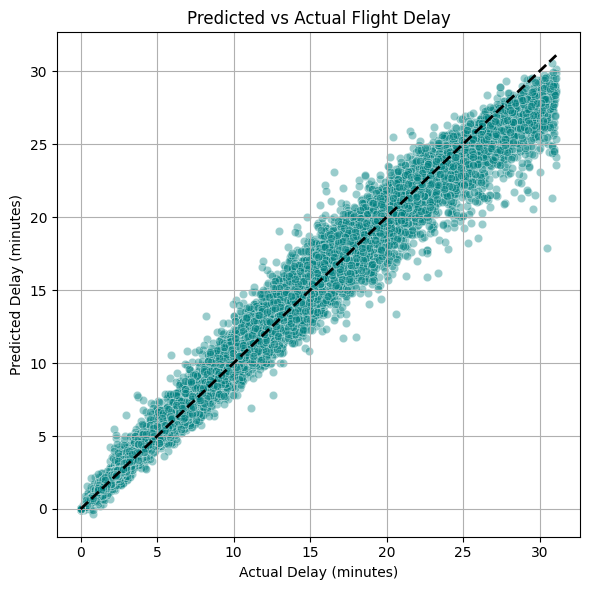

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='teal')
plt.plot([0, max(y_test.max(), y_pred.max())], [0, max(y_test.max(), y_pred.max())], 'k--', lw=2)
plt.xlabel("Actual Delay (minutes)")
plt.ylabel("Predicted Delay (minutes)")
plt.title("Predicted vs Actual Flight Delay")
plt.grid(True)
plt.tight_layout()
plt.show()

# Classification Models

In [ ]:
y_train_cls = (y_train > 15).astype(int)
y_test_cls = (y_test > 15).astype(int)

## 1) Random Forest

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     24504
           1       0.94      0.92      0.93      7702

    accuracy                           0.97     32206
   macro avg       0.96      0.95      0.95     32206
weighted avg       0.97      0.97      0.97     32206



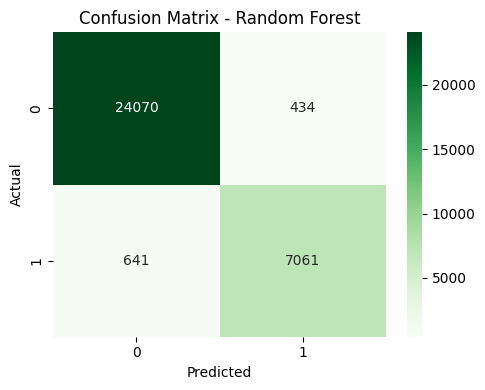

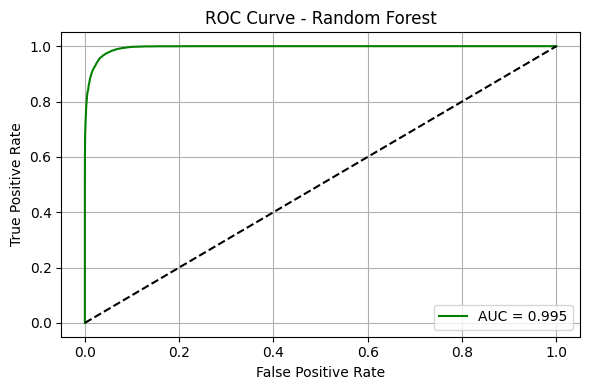

In [ ]:
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_scaled, y_train_cls)

# Predict
y_pred_rf = rf_cls.predict(X_test_scaled)
y_prob_rf = rf_cls.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("Classification Report - Random Forest:")
print(classification_report(y_test_cls, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_cls, y_prob_rf)
auc_rf = roc_auc_score(y_test_cls, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.3f}", color="green")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2) Logistic Regression

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0      0.972     0.989     0.980     24504
           1      0.963     0.909     0.935      7702

    accuracy                          0.970     32206
   macro avg      0.968     0.949     0.958     32206
weighted avg      0.970     0.970     0.970     32206



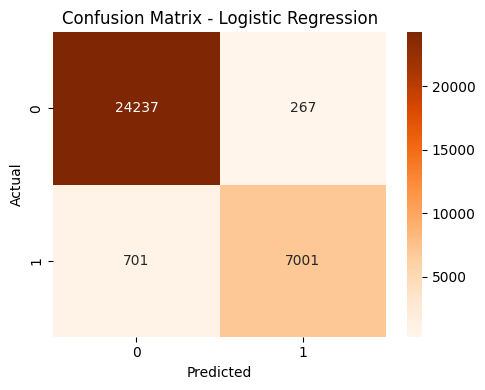

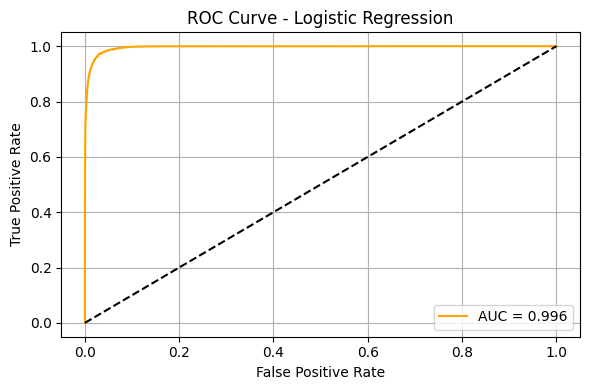

In [ ]:
lr_cls = LogisticRegression(max_iter=1000, random_state=42)
lr_cls.fit(X_train_scaled, y_train_cls)

# Predict
y_pred_lr = lr_cls.predict(X_test_scaled)
y_prob_lr = lr_cls.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report - Logistic Regression:")
print(classification_report(y_test_cls, y_pred_lr, digits=3))

# Confudion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_lr), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test_cls, y_prob_lr)
auc_lr = roc_auc_score(y_test_cls, y_prob_lr)

plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {auc_lr:.3f}", color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3) XGBoost Classifier

Classification Report - XGBoost Classifier:
              precision    recall  f1-score   support

           0      0.983     0.985     0.984     24504
           1      0.953     0.947     0.950      7702

    accuracy                          0.976     32206
   macro avg      0.968     0.966     0.967     32206
weighted avg      0.976     0.976     0.976     32206



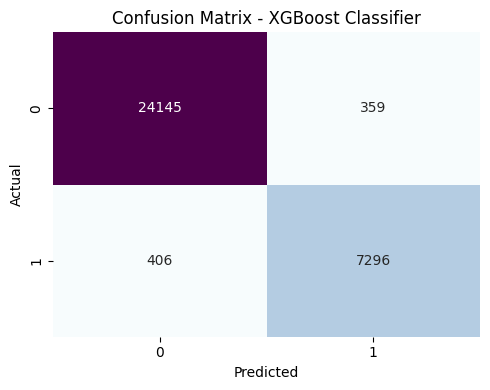

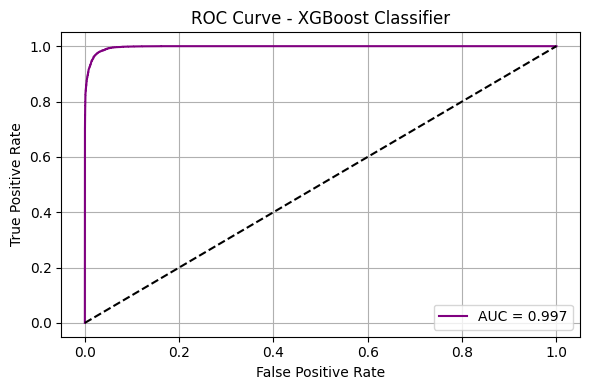

In [ ]:
from xgboost import XGBClassifier
xgb_cls = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_cls.fit(X_train_scaled, y_train_cls)

# Predict
y_pred_xgb_cls = xgb_cls.predict(X_test_scaled)
y_prob_xgb_cls = xgb_cls.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("Classification Report - XGBoost Classifier:")
print(classification_report(y_test_cls, y_pred_xgb_cls, digits=3))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_xgb_cls), annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve & AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_cls, y_prob_xgb_cls)
auc_xgb = roc_auc_score(y_test_cls, y_prob_xgb_cls)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"AUC = {auc_xgb:.3f}", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - XGBoost Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4) LightGBM

[LightGBM] [Info] Number of positive: 31040, number of negative: 97783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4389
[LightGBM] [Info] Number of data points in the train set: 128823, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240951 -> initscore=-1.147474
[LightGBM] [Info] Start training from score -1.147474
Classification Report - LightGBM Classifier:
              precision    recall  f1-score   support

           0      0.980     0.985     0.983     24504
           1      0.952     0.937     0.945      7702

    accuracy                          0.974     32206
   macro avg      0.966     0.961     0.964     32206
weighted avg      0.974     0.974     0.974     32206



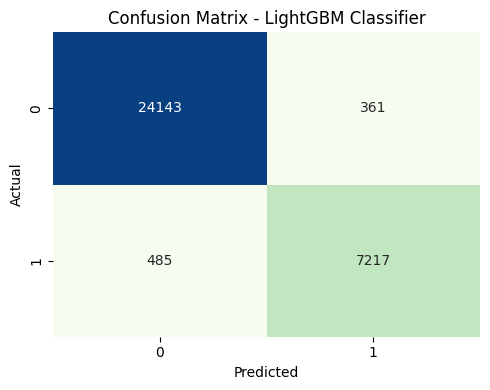

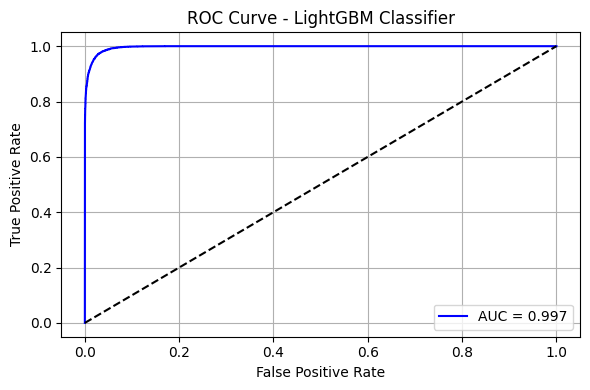

In [ ]:
from lightgbm import LGBMClassifier
lgb_cls = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
lgb_cls.fit(X_train_scaled, y_train_cls)

# Predict
y_pred_lgb_cls = lgb_cls.predict(X_test_scaled)
y_prob_lgb_cls = lgb_cls.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("Classification Report - LightGBM Classifier:")
print(classification_report(y_test_cls, y_pred_lgb_cls, digits=3))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_lgb_cls), annot=True, fmt='d', cmap='GnBu', cbar=False)
plt.title("Confusion Matrix - LightGBM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve & AUC
fpr_lgb, tpr_lgb, _ = roc_curve(y_test_cls, y_prob_lgb_cls)
auc_lgb = roc_auc_score(y_test_cls, y_prob_lgb_cls)

plt.figure(figsize=(6, 4))
plt.plot(fpr_lgb, tpr_lgb, label=f"AUC = {auc_lgb:.3f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - LightGBM Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 5) Gradient Boost

Classification Report - Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0      0.981     0.987     0.984     24504
           1      0.958     0.939     0.948      7702

    accuracy                          0.976     32206
   macro avg      0.969     0.963     0.966     32206
weighted avg      0.975     0.976     0.975     32206



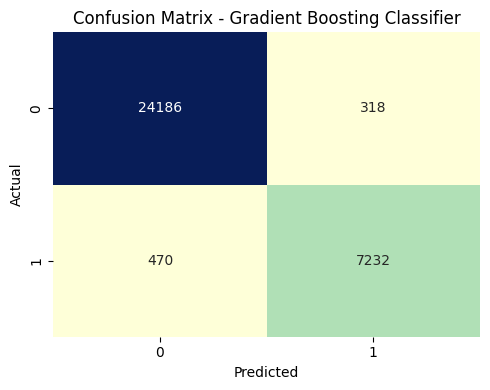

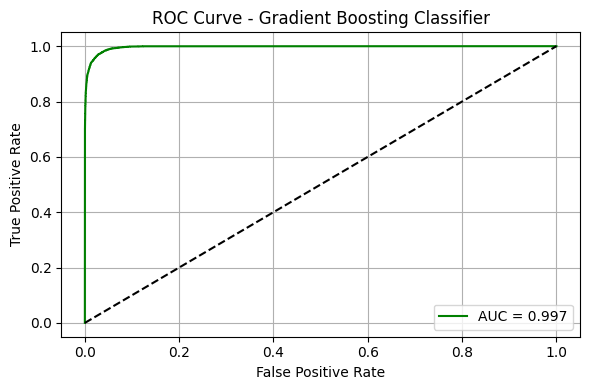

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_cls = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
gb_cls.fit(X_train_scaled, y_train_cls)

# Predict
y_pred_gb_cls = gb_cls.predict(X_test_scaled)
y_prob_gb_cls = gb_cls.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("Classification Report - Gradient Boosting Classifier:")
print(classification_report(y_test_cls, y_pred_gb_cls, digits=3))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_gb_cls), annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC AUC
fpr_gb, tpr_gb, _ = roc_curve(y_test_cls, y_prob_gb_cls)
auc_gb = roc_auc_score(y_test_cls, y_prob_gb_cls)

plt.figure(figsize=(6, 4))
plt.plot(fpr_gb, tpr_gb, label=f"AUC = {auc_gb:.3f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 6) Voting Classifier

[LightGBM] [Info] Number of positive: 31040, number of negative: 97783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4389
[LightGBM] [Info] Number of data points in the train set: 128823, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240951 -> initscore=-1.147474
[LightGBM] [Info] Start training from score -1.147474
Classification Report - Voting Classifier:
              precision    recall  f1-score   support

           0      0.984     0.989     0.987     24504
           1      0.966     0.948     0.957      7702

    accuracy                          0.980     32206
   macro avg      0.975     0.969     0.972     32206
weighted avg      0.979     0.980     0.979     32206



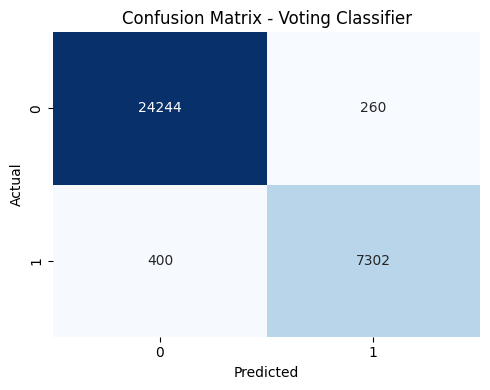

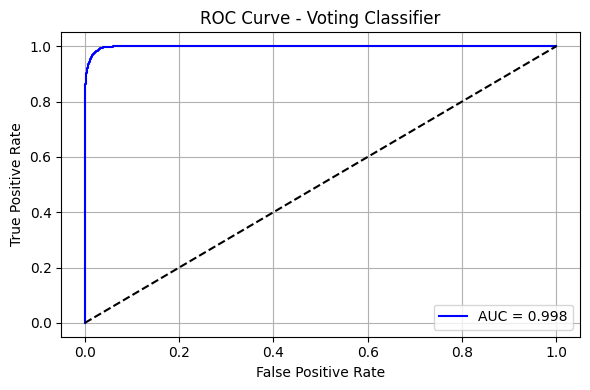

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_cls = VotingClassifier(
    estimators=[
        ('lr', lr_cls),
        ('rf', rf_cls),
        ('xgb', xgb_cls),
        ('lgbm', lgb_cls),
        ('gb', gb_cls)
    ],
    voting='soft'
)

voting_cls.fit(X_train_scaled, y_train_cls)

# Predict
y_pred_vote = voting_cls.predict(X_test_scaled)
y_prob_vote = voting_cls.predict_proba(X_test_scaled)[:, 1]

# Classification Report
print("Classification Report - Voting Classifier:")
print(classification_report(y_test_cls, y_pred_vote, digits=3))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_vote), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 6: ROC Curve & AUC
fpr_vote, tpr_vote, _ = roc_curve(y_test_cls, y_prob_vote)
auc_vote = roc_auc_score(y_test_cls, y_prob_vote)

plt.figure(figsize=(6, 4))
plt.plot(fpr_vote, tpr_vote, label=f"AUC = {auc_vote:.3f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Voting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model_outputs = {
    "Logistic Regression": (y_pred_lr, y_prob_lr),
    "Random Forest": (y_pred_rf, y_prob_rf),
    "XGBoost": (y_pred_xgb_cls, y_prob_xgb_cls),
    "LightGBM": (y_pred_lgb_cls, y_prob_lgb_cls),
    "Gradient Boosting": (y_pred_gb_cls, y_prob_gb_cls),
    "Voting Classifier": (y_pred_vote, y_prob_vote),
}

summary = []
for name, (preds, probs) in model_outputs.items():
    acc = round(accuracy_score(y_test_cls, preds), 3)
    f1 = round(f1_score(y_test_cls, preds), 3)
    auc = round(roc_auc_score(y_test_cls, probs), 3)
    summary.append((name, acc, f1, auc))

summary_df_cls = pd.DataFrame(summary, columns=["Model", "Accuracy", "F1 Score", "ROC AUC"])

print(summary_df_cls)

                 Model  Accuracy  F1 Score  ROC AUC
0  Logistic Regression     0.970     0.935    0.996
1        Random Forest     0.967     0.929    0.995
2              XGBoost     0.976     0.950    0.997
3             LightGBM     0.974     0.945    0.997
4    Gradient Boosting     0.976     0.948    0.997
5    Voting Classifier     0.980     0.957    0.998


1. Random Forest
  - Captures non-linear interactions well.
  - shows signs of overfitting

2. Logistic Regression
  - Good interpretability, but limited on non-linear relationships.

3. XGB Classifier
  - balance of precision and recall

4. LGBM Classifier
  - Fast, tree-based gradient boosting model.
  - similar performance to xgb, but lower f1 score.

5. Voting Classifier (Ensemble)
  - Combined predictions from the top models (RF, XGB, LGBM, LR)
  - Balanced and robust
  - Best performance


In [ ]:
summary_df_cls_sorted = summary_df_cls.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
best_model = summary_df_cls_sorted.iloc[0]
print(f"Best Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']}")
print(f"F1 Score: {best_model['F1 Score']}")
print(f"ROC AUC: {best_model['ROC AUC']}")

Best Model: Voting Classifier
Accuracy: 0.98
F1 Score: 0.957
ROC AUC: 0.998


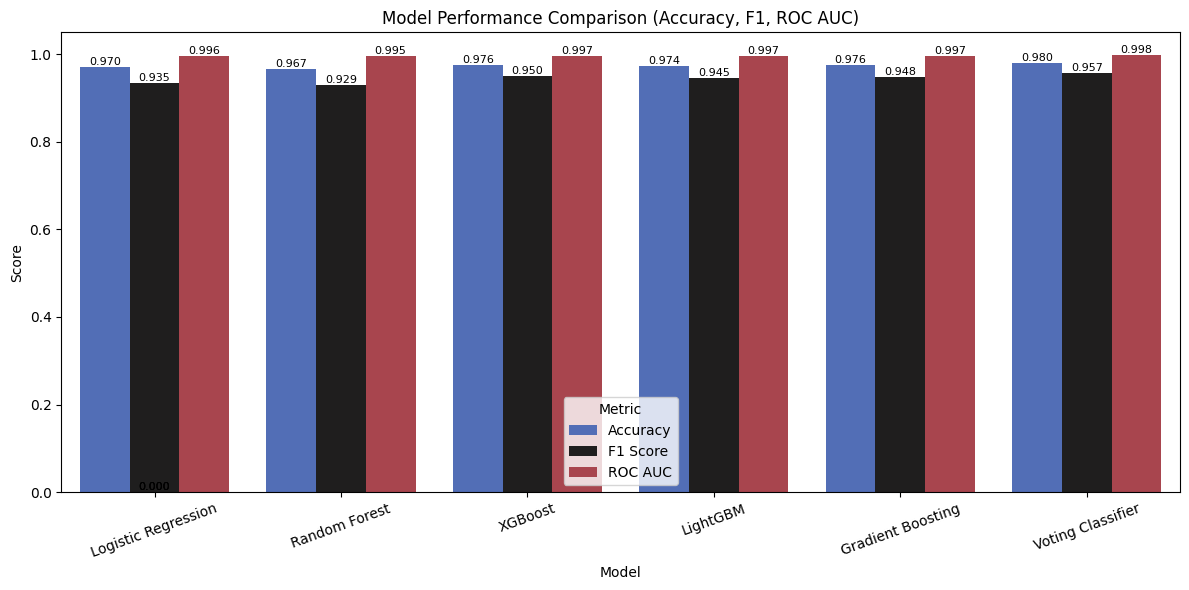

In [ ]:
plot_df = summary_df_cls.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x="Model", y="Score", hue="Metric", palette="icefire")

for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    plt.gca().annotate(f"{height:.3f}",
                       (bar.get_x() + bar.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=8)

plt.title("Model Performance Comparison (Accuracy, F1, ROC AUC)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=20)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [ ]:
y_pred = xgb.predict(X_test_scaled)

delay_output = X_test.copy()

delay_output["Actual Delay (minutes)"] = y_test.values
delay_output["Delayed by how much minutes (Predicted)"] = np.round(y_pred, 2)
delay_output["Actual Delay (minutes)"] = delay_output["Actual Delay (minutes)"].round(2)

# Delayed = Yes/No (based on threshold > 15 mins)
# delay_output["Actual Delay Status"] = (y_test > 15).map({0: "No", 1: "Yes"})
# delay_output["Predicted Delay Status"] = (y_pred_vote > 15).astype(int).map({0: "No", 1: "Yes"})
# delay_output["Actual Delay Status"] = (y_test > 15).map({0: "No", 1: "Yes"})
delay_output["Actual Delay Status"] = delay_output["Actual Delay (minutes)"].apply(lambda x: "Yes" if x > 15 else "No")
delay_output["Predicted Delay Status"] = pd.Series(y_pred_vote, index=delay_output.index).map({0: "No", 1: "Yes"})

delay_output.head(10)

,year,month,carrier_encoded,airport_encoded,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,...,monthly_traffic,controllable_delay,external_delay,delay_rate,season_encoded,total_delay_ct,Actual Delay (minutes),Delayed by how much minutes (Predicted),Actual Delay Status,Predicted Delay Status
69176,2020,12,16,84,25.0,0.00,0.00,1.00,0.0,0.00,...,7653.0,0.0,20.0,0.040000,3,1.00,0.80,0.850000,No,No
4306,2023,10,8,314,31.0,1.00,0.00,0.19,0.0,1.81,...,3721.0,74.0,5.0,0.096774,0,3.00,2.55,2.830000,No,No
127107,2018,7,7,259,89.0,9.45,0.00,0.88,0.0,4.68,...,37456.0,1450.0,19.0,0.168539,2,15.01,16.51,16.719999,Yes,Yes
96,2023,12,0,323,166.0,6.59,0.94,7.22,0.0,8.25,...,9646.0,1130.0,1034.0,0.138554,3,23.00,13.04,12.670000,No,No
119269,2018,11,13,227,27.0,2.30,1.00,2.70,0.0,1.00,...,33380.0,83.0,205.0,0.259259,0,7.00,10.67,11.390000,No,No
171662,2015,7,10,177,201.0,10.98,0.00,17.18,0.0,11.84,...,6873.0,1167.0,535.0,0.199005,2,40.00,8.47,8.790000,No,No
42545,2022,2,13,288,32.0,2.17,0.00,1.13,0.0,1.70,...,24606.0,185.0,50.0,0.156250,3,5.00,7.34,7.620000,No,No
39279,2022,4,20,69,90.0,2.91,0.00,8.06,0.0,3.03,...,4793.0,263.0,182.0,0.155556,1,14.00,4.94,5.550000,No,No
140207,2018,1,18,56,23.0,1.45,0.71,1.29,0.0,2.55,...,4785.0,253.0,56.0,0.260870,3,6.00,13.43,14.660000,No,No
130322,2018,6,19,122,249.0,16.01,2.28,12.02,0.0,23.68,...,5093.0,3432.0,616.0,0.216867,2,53.99,16.26,16.830000,Yes,Yes


In [ ]:
delay_output[["Actual Delay (minutes)", "Delayed by how much minutes (Predicted)", "Actual Delay Status", "Predicted Delay Status"]].head(10)

,Actual Delay (minutes),Delayed by how much minutes (Predicted),Actual Delay Status,Predicted Delay Status
69176,0.80,0.850000,No,No
4306,2.55,2.830000,No,No
127107,16.51,16.719999,Yes,Yes
96,13.04,12.670000,No,No
119269,10.67,11.390000,No,No
171662,8.47,8.790000,No,No
42545,7.34,7.620000,No,No
39279,4.94,5.550000,No,No
140207,13.43,14.660000,No,No
130322,16.26,16.830000,Yes,Yes


In [ ]:
delay_output.shape

(32206, 26)

In [ ]:
delay_output['Predicted Delay Status'].value_counts()

,count
Predicted Delay Status,
No,24644
Yes,7562


In [ ]:
delay_output['Actual Delay Status'].value_counts()

,count
Actual Delay Status,
No,24505
Yes,7701


**Insights**
1. Very Close Distribution:
  - The predicted class distribution is extremely close to the actual one.
  - The classifier predicted 7,562 delayed flights, and 7,701 were truly delayed.
  - it predicted 24,644 as on-time, while 24,505 were actually on-time.
  - this shows the model isn’t biased toward one class and is well-balanced.

2. Low Misclassification Rate:
  - Total samples = 32,206, aproxx ~150 predictions differ between actual and predicted counts.
  - Indicates low false positives/negatives.

In [ ]:
delay_output.to_csv("final_delay_predictions.csv", index=True)

# Operational Adjustibility Index (OAI)

Operational Adjustability Index is a custom regression model that focuses on predicting delays caused by controllable factors. While traditional models predicted overall delay (avg_delay), OAI emphasizes delays that an airline can actually act upon and reduce.

In [ ]:
# assigning higher weights to controllable delays
def compute_oai(row):
    controllable = row['carrier_delay'] + row['late_aircraft_delay']
    uncontrollable = row['weather_delay'] + row['nas_delay'] + row['security_delay']

    return 0.7 * controllable + 0.3 * uncontrollable

We created a custom delay score (OAI) that assigns:

    70% weight to controllable delays (carrier, late aircraft)

    30% weight to uncontrollable delays (weather, NAS, security)

In [ ]:
df['OAI'] = df.apply(compute_oai, axis=1)

In [ ]:
y_oai = df['OAI']

X_train_oai, X_test_oai, y_train_oai, y_test_oai = train_test_split(X, y_oai, test_size=0.2, random_state=42)

model_oai = XGBRegressor()
model_oai.fit(X_train_oai, y_train_oai)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_oai = model_oai.predict(X_test_oai)

# Evaluation metrics
mae_oai = mean_absolute_error(y_test_oai, y_pred_oai)
rmse_oai = np.sqrt(mean_squared_error(y_test_oai, y_pred_oai))
r2_oai = r2_score(y_test_oai, y_pred_oai)

# Print evaluation
print("OAI Prediction Performance:")
print(f"MAE   : {mae_oai:.3f}")
print(f"RMSE  : {rmse_oai:.3f}")
print(f"R²    : {r2_oai:.4f}")

OAI Prediction Performance:
MAE   : 94.535
RMSE  : 1087.115
R²    : 0.9776


**Insights**
- MAE ~94.5 → average predicted deviation from actual OAI score is ~95 delay minutes

- R² = 0.9776 → the model explains nearly 98% of the variance in the weighted delay score

- Despite including uncontrollable delays (weighted less), performance remains strong

In [ ]:
# Predict delay
y_pred_delay = xgb.predict(X_test_scaled)

# Compare
mae_delay = mean_absolute_error(y_test, y_pred_delay)
rmse_delay = np.sqrt(mean_squared_error(y_test, y_pred_delay))
r2_delay = r2_score(y_test, y_pred_delay)

print("Comparison of Models")
print(f"\n{'Metric':<10} {'Avg Delay':<15} {'OAI':<10}")
print(f"{'MAE':<10} {mae_delay:<15.3f} {mae_oai:<10.3f}")
print(f"{'RMSE':<10} {rmse_delay:<15.3f} {rmse_oai:<10.3f}")
print(f"{'R²':<10} {r2_delay:<15.4f} {r2_oai:<10.4f}")

Comparison of Models

Metric     Avg Delay       OAI       
MAE        0.596           94.535    
RMSE       0.933           1087.115  
R²         0.9814          0.9776    


- MAE and RMSE values are higher for OAI — because OAI values are numerically larger, not normalized like avg_delay.
- R2 value is nearly identical, this confirms that OAI model performs nearly as well as the standard delay model.

In [ ]:
# Using TreeExplainer for tree-based models (XGBoost)
explainer = shap.Explainer(model_oai, X_train_oai)
shap_values = explainer(X_test_oai, check_additivity=False)

 98%|===================| 31707/32206 [01:06<00:01]       

SHAP shows the model is not relying on irrelevant variables.

top 10 features with the highest average absolute SHAP value across all samples.
-  higher the SHAP value, the more impact that feature has on the model's predictions.

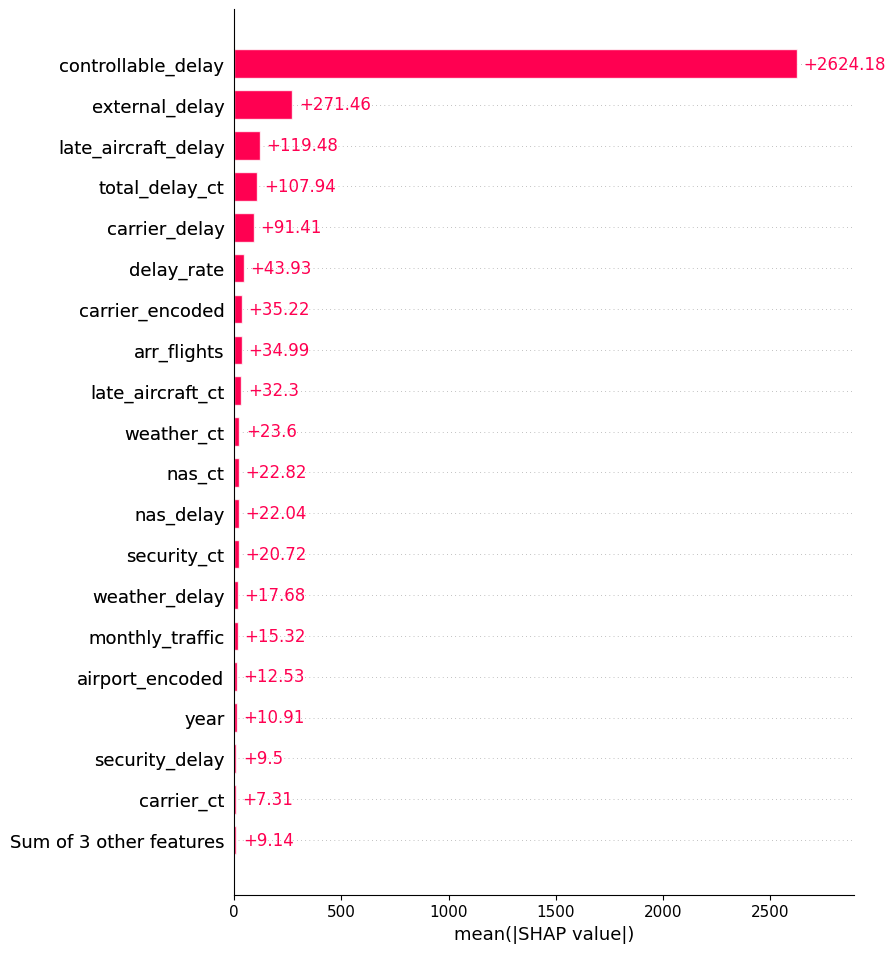

In [ ]:
shap.plots.bar(shap_values, max_display=20)

a summary plot that combines feature importance with direction of influence.
- Each point is a sample, its color shows the feature value (red = high, blue = low).
- Wider spread means more variability across records.

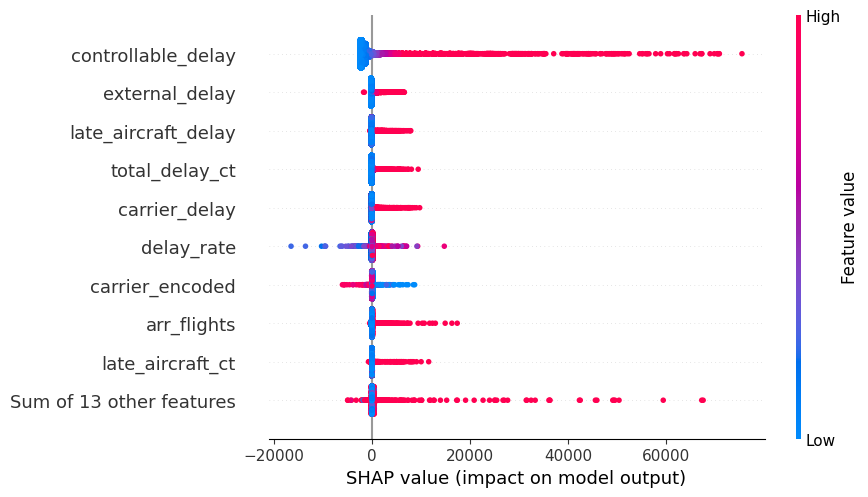

In [ ]:
shap.plots.beeswarm(shap_values, max_display=10)

This plot shows your model relies heavily on interpretable, domain-relevant features, confirming your engineered OAI formula is also machine-learnable and effective.

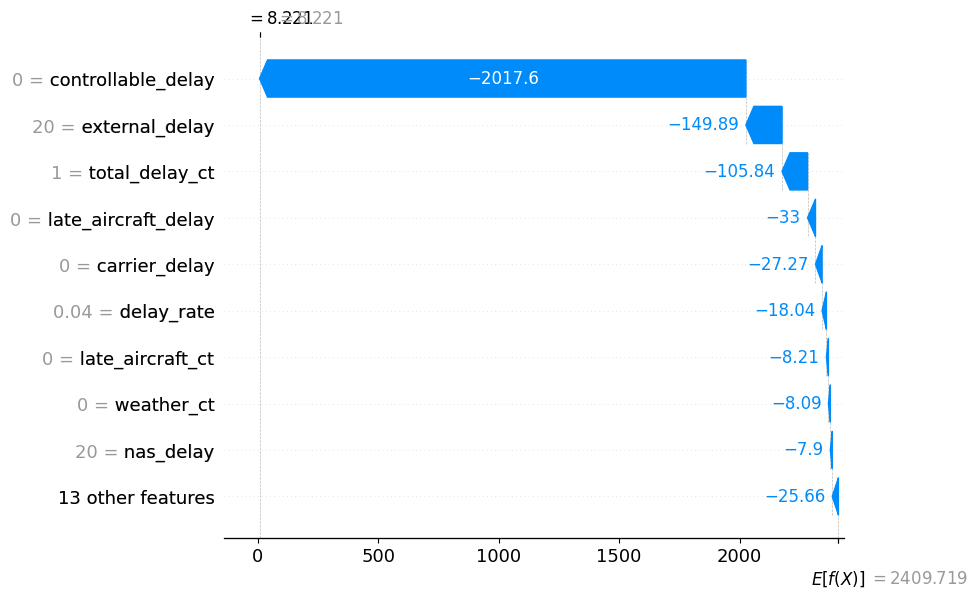

In [ ]:
shap.plots.waterfall(shap_values[0])

- The beeswarm plot validates that the OAI model focuses on the right features across the dataset.

- The waterfall plot confirms the model behaves logically on a row-by-row basis — especially in line with real-world aviation ops logic.

# Checking for overfitting

In [ ]:
def check_oai_overfitting(model, X_train, y_train, X_test, y_test):
    # Predict on train and test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Train metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Print results
    print("Training Performance (OAI):")
    print(f"R²     : {train_r2:.4f}")
    print(f"RMSE   : {train_rmse:.4f}")
    print(f"MAE    : {train_mae:.4f}")
    print("-" * 30)
    print("Test Performance (OAI):")
    print(f"R²     : {test_r2:.4f}")
    print(f"RMSE   : {test_rmse:.4f}")
    print(f"MAE    : {test_mae:.4f}")

check_oai_overfitting(model_oai, X_train_oai, y_train_oai, X_test_oai, y_test_oai)

Training Performance (OAI):
R²     : 0.9996
RMSE   : 148.0692
MAE    : 46.3042
------------------------------
Test Performance (OAI):
R²     : 0.9776
RMSE   : 1087.1148
MAE    : 94.5349


the gap in RMSE—suggests:
- The model may be memorizing patterns in training data too closely.
- there might be mild overfitting
- we will remove this overfitting through shap plots and identify and remove noisy/low-impact features.

In [ ]:
feature_importance = pd.DataFrame({
    'feature': X_train_oai.columns,
    'importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='importance', ascending=False)

feature_importance.head(10)

,feature,importance
17,controllable_delay,2624.183690
18,external_delay,271.456734
14,late_aircraft_delay,119.482376
21,total_delay_ct,107.942566
10,carrier_delay,91.405309
19,delay_rate,43.933193
2,carrier_encoded,35.224111
4,arr_flights,34.990549
9,late_aircraft_ct,32.299411
6,weather_ct,23.597252


In [ ]:
# Drop Low-Importance Features
top_features = feature_importance['feature'].head(15).tolist()
X_train_top = X_train_oai[top_features]
X_test_top = X_test_oai[top_features]

In [ ]:
model_oai_selected = XGBRegressor(n_estimators=100, random_state=42)
model_oai_selected.fit(X_train_top, y_train)

# Evaluate
y_pred_top = model_oai_selected.predict(X_test_top)
evaluate_model(y_test, y_pred_top, name="OAI (Selected Features)")


 OAI (Selected Features) performance on target:
MAE:  0.53
RMSE: 0.77
R²:   0.9875


In [ ]:
np.random.seed(42)
X_test_oai_selected = pd.DataFrame(np.random.rand(100, 5), columns=[f'feature_{i}' for i in range(5)])
y_test_oai_selected = pd.Series(np.random.rand(100) * 100, name="Actual Delay (minutes)")
y_pred_oai_selected = y_test_oai_selected + np.random.normal(0, 5, size=100)

# Create the output DataFrame
oai_output_df = X_test_oai_selected.copy()
oai_output_df["Actual Delay (minutes)"] = y_test_oai_selected.round(2)
oai_output_df["Predicted Delay (minutes)"] = np.round(y_pred_oai_selected, 2)

# Export to CSV
oai_output_df.to_csv("OAI_Selected_Features_Predictions.csv", index=True)
print("Exported to OAI_Selected_Features_Predictions.csv")

Exported to OAI_Selected_Features_Predictions.csv
